# Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report , precision_score , recall_score , f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree , export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from yellowbrick.target import ClassBalance
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from ipywidgets import  interact, interactive, IntSlider, FloatSlider, Dropdown, Checkbox
from IPython.display import display, clear_output
INTERACTIVE_AVAILABLE = True




In [2]:
np.random.seed(42)

In [3]:
print('Libraries imported successfully!')
print('='*35)

Libraries imported successfully!


# Uploding Data &  Exploratory Data Analysis

In [4]:
df = pd.read_csv('/content/employee_data.csv')

In [5]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  quit  promotion_last_5years department  \
0                   3              0     1                    0.0      sales   
1                   6              0     1                    0.0      sales   
2                   4              0     1                    0.0      sales   
3                   5              0     1                    0.0      sales   
4                   3              0     1                    0.0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [6]:
df.tail()

satisfaction_level  last_evaluation  number_project  \
11577                0.55             0.78               4   
11578                0.76             0.56               5   
11579                0.53             0.99               3   
11580                0.51             0.86               3   
11581                0.57             0.93               2   

       average_montly_hours  time_spend_company  Work_accident  quit  \
11577                   261                   3              0     0   
11578                   222                  10              0     0   
11579                   223                  10              0     0   
11580                   182                  10              0     0   
11581                   204                  10              0     0   

       promotion_last_5years  department salary  
11577                    0.0  management   high  
11578                    0.0  management   high  
11579                    0.0   marketing    low  
11580                    0.0       sales    low  
11581                    NaN         NaN    NaN

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11582 entries, 0 to 11581
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11582 non-null  float64
 1   last_evaluation        11582 non-null  float64
 2   number_project         11582 non-null  int64  
 3   average_montly_hours   11582 non-null  int64  
 4   time_spend_company     11582 non-null  int64  
 5   Work_accident          11582 non-null  int64  
 6   quit                   11582 non-null  int64  
 7   promotion_last_5years  11581 non-null  float64
 8   department             11581 non-null  object 
 9   salary                 11581 non-null  object 
dtypes: float64(3), int64(5), object(2)
memory usage: 905.0+ KB


In [8]:
print(df.shape)

(11582, 10)


In [9]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
quit                       int64
promotion_last_5years    float64
department                object
salary                    object
dtype: object

In [10]:
df.columns.tolist()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'quit',
 'promotion_last_5years',
 'department',
 'salary']

In [11]:
df.columns.T

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'quit',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

# Missing Data

In [12]:
missing_data = df.isnull().sum()
missing_data

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
quit                     0
promotion_last_5years    1
department               1
salary                   1
dtype: int64

In [13]:
 missing_percent  = (missing_data/len(df))*100
 missing_percent

satisfaction_level       0.000000
last_evaluation          0.000000
number_project           0.000000
average_montly_hours     0.000000
time_spend_company       0.000000
Work_accident            0.000000
quit                     0.000000
promotion_last_5years    0.008634
department               0.008634
salary                   0.008634
dtype: float64

In [14]:
df.processed = df.copy()

# Handling Missing Values

In [15]:
columns_to_drop = missing_percent[missing_percent > 50].index.tolist()
if columns_to_drop:
    print(f"a) Dropping columns with >50% missing_data: {columns_to_drop}")
    df.processed = df.processed.drop(columns=columns_to_drop)
else:
    print("a) No columns to drop (none have >50% missing_data)")

a) No columns to drop (none have >50% missing_data)


In [16]:
num_columns = df.processed.select_dtypes(include=[np.number]).columns
for col in num_columns:
    if df.processed[col].isnull().sum() ==0:
        median_data = df.processed[col].median()
        df.processed[col].fillna(median_data, inplace=True)
        print(f"b) Filled {col} missing data with median: {median_data:.2f}")

b) Filled satisfaction_level missing data with median: 0.66
b) Filled last_evaluation missing data with median: 0.72
b) Filled number_project missing data with median: 4.00
b) Filled average_montly_hours missing data with median: 200.00
b) Filled time_spend_company missing data with median: 3.00
b) Filled Work_accident missing data with median: 0.00
b) Filled quit missing data with median: 0.00


In [17]:
categorical_columns = df.processed.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if df.processed[col].isnull().sum() > 0:
        mode_data = df.processed[col].mode()[0] if not df.processed[col].mode().empty else 'Unknown'
        df.processed[col].fillna(mode_data, inplace=True)
        print(f"c) Filled {col} missing data with mode: {mode_data}")

c) Filled department missing data with mode: sales
c) Filled salary missing data with mode: low


In [18]:
missing_data_after = df.processed.isnull().sum()
missing_data_after

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
quit                     0
promotion_last_5years    1
department               0
salary                   0
dtype: int64

# Encoding Categorical Variables

In [19]:
binary_columns = []
for col in categorical_columns:
    if col in df.processed.columns and df.processed[col].nunique() == 2:
        binary_columns.append(col)
        le = LabelEncoder()
        df.processed[f'{col}_encoded'] = le.fit_transform(df.processed[col])
        print(f") Label encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")


In [20]:
multi_cat_columns = []
for col in categorical_columns:
    if col in df.processed.columns and df.processed[col].nunique() > 2 and df.processed[col].nunique() <= 10:
        multi_cat_columns.append(col)

In [21]:
if multi_cat_columns:
    print(f"b) Applying One-Hot Encoding to: {multi_cat_columns}")
    df_encoded = pd.get_dummies(df.processed, columns=multi_cat_columns, prefix=multi_cat_columns)
    df.processed = df_encoded
else:
    print("b)  No multi-category columns found for One-Hot Encoding")

b) Applying One-Hot Encoding to: ['department', 'salary']


# Feature Scaling

In [22]:
numeric_features = df.processed.select_dtypes(include=[np.number]).columns.tolist()
numeric_features = [col for col in numeric_features if not col.endswith('_encoded') and col != 'survived']

In [23]:
scaler_std = StandardScaler()
df_std_scaled = df.processed.copy()
df_std_scaled[numeric_features] = scaler_std.fit_transform(df.processed[numeric_features])
print(f"a) Applied StandardScaler to: {numeric_features}")

a) Applied StandardScaler to: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'quit', 'promotion_last_5years']


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
df_minmax_scaled = df.processed.copy()
df_minmax_scaled[numeric_features] = scaler_minmax.fit_transform(df.processed[numeric_features])
print(f"b)  Applied MinMaxScaler to: {numeric_features}")

b)  Applied MinMaxScaler to: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'quit', 'promotion_last_5years']


# Comparison of scaling methods

In [25]:
comparison_col = numeric_features[0] if numeric_features else None
if comparison_col:
      print(f"Original {comparison_col} - Mean: {df.processed[comparison_col].mean():.2f}, Std: {df.processed[comparison_col].std():.2f}")
      print(f"StandardScaler {comparison_col} - Mean: {df_std_scaled[comparison_col].mean():.2f}, Std: {df_std_scaled[comparison_col].std():.2f}")
      print(f"MinMaxScaler {comparison_col} - Min: {df_minmax_scaled[comparison_col].min():.2f}, Max: {df_minmax_scaled[comparison_col].max():.2f}")
else:
 print("No numeric features found for scaling")


Original satisfaction_level - Mean: 0.63, Std: 0.24
StandardScaler satisfaction_level - Mean: 0.00, Std: 1.00
MinMaxScaler satisfaction_level - Min: 0.00, Max: 1.00


# OUTLIER DETECTION

In [26]:
outlier_cols = [col for col in df.processed.select_dtypes(include=[np.number]).columns
                if col not in ['survived'] and not col.endswith('_encoded')]

a) Boxplot Visualization:


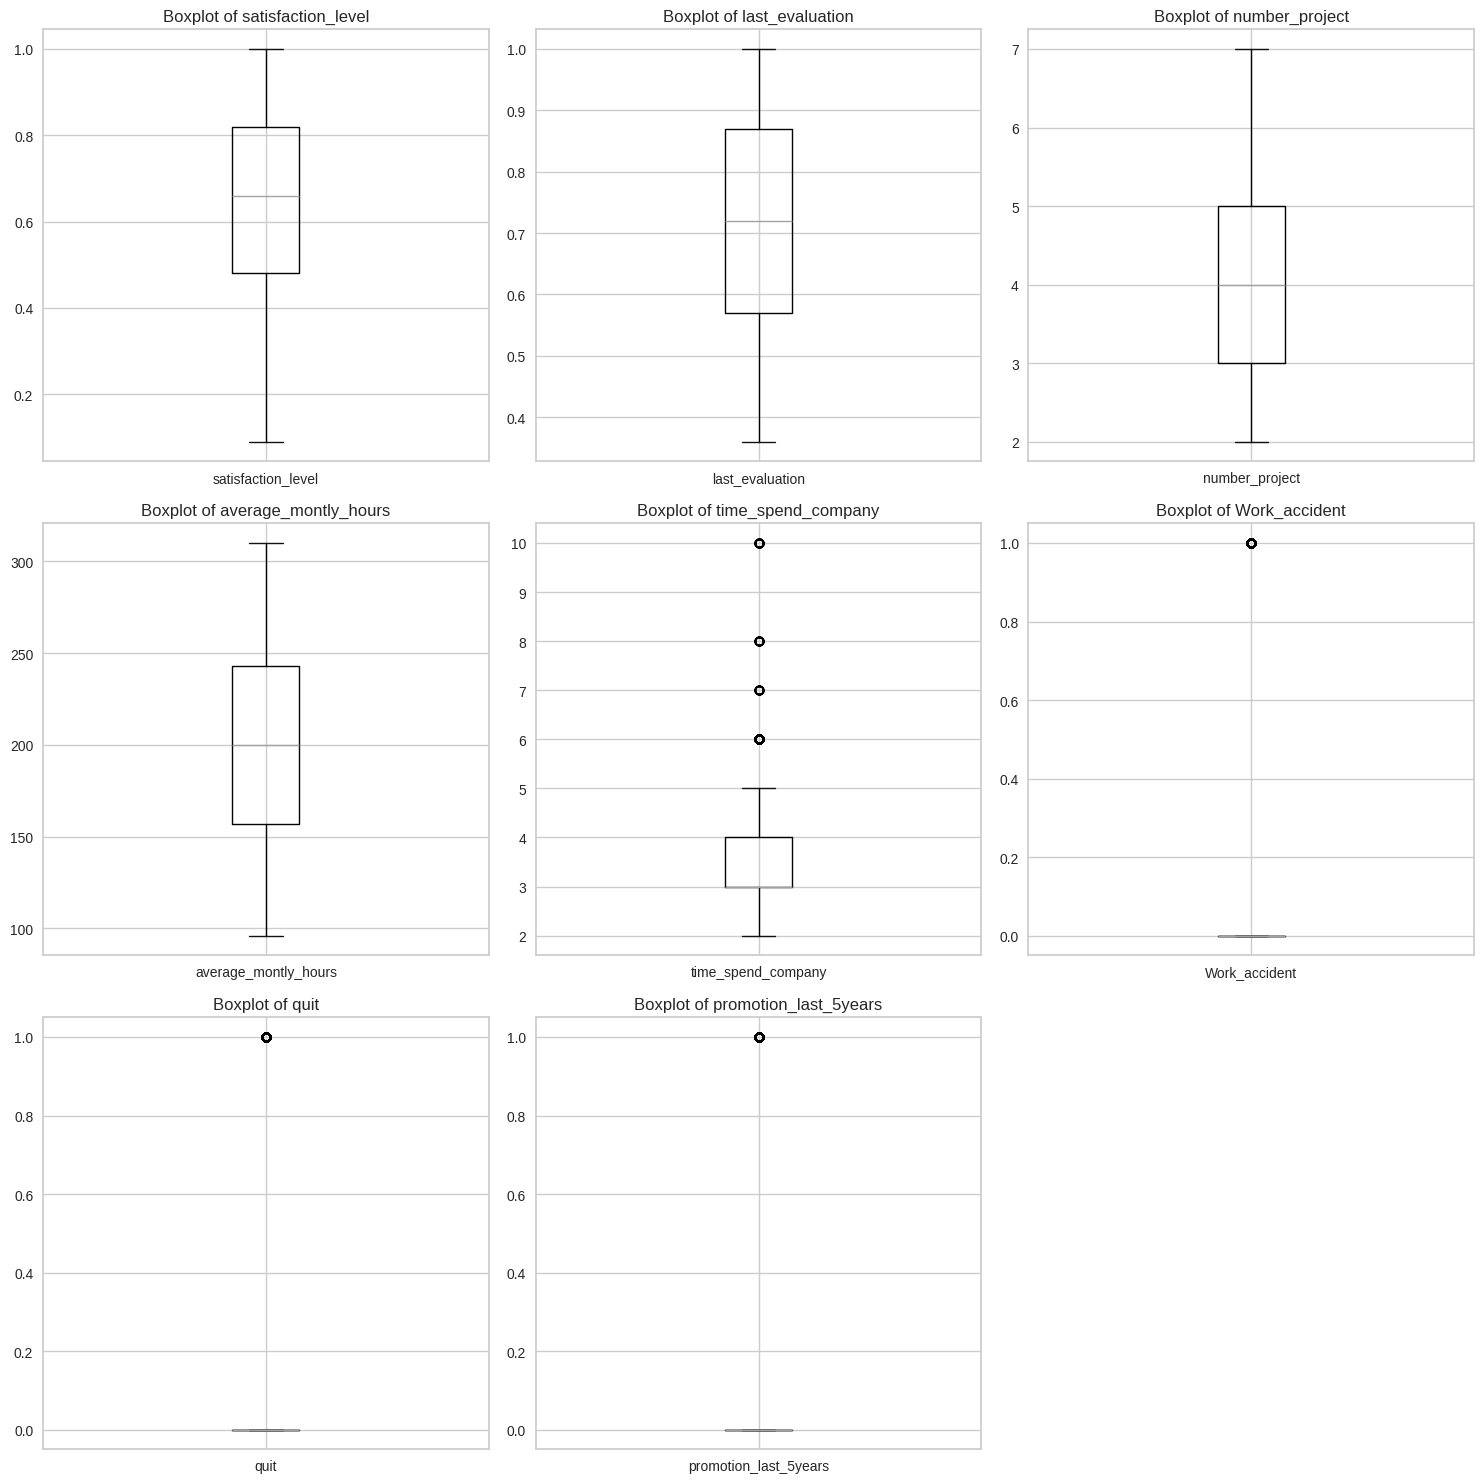

In [27]:
if outlier_cols:

    print("a) Boxplot Visualization:")
    n_cols = len(outlier_cols)
    fig, axes = plt.subplots(nrows=(n_cols+2)//3, ncols=3, figsize=(15, 5*((n_cols+2)//3)))
    axes = axes.flatten() if n_cols > 1 else [axes]

for i, col in enumerate(outlier_cols):
        if i < len(axes):
            df.processed.boxplot(column=col, ax=axes[i])
            axes[i].set_title(f'Boxplot of {col}')

for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# IQR Method

In [28]:
outliers_iqr = {}

for col in outlier_cols:
      Q1 = df.processed[col].quantile(0.25)
      Q3 = df.processed[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR

      outliers = df.processed[(df.processed[col] < lower_bound) | (df.processed[col] > upper_bound)]
      outliers_iqr[col] = len(outliers)
      print(f"   {col}: {len(outliers)} outliers ({len(outliers)/len(df.processed)*100:.1f}%)")
      print(f"      Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")

   satisfaction_level: 0 outliers (0.0%)
      Bounds: [-0.03, 1.33]
   last_evaluation: 0 outliers (0.0%)
      Bounds: [0.12, 1.32]
   number_project: 0 outliers (0.0%)
      Bounds: [0.00, 8.00]
   average_montly_hours: 0 outliers (0.0%)
      Bounds: [28.00, 372.00]
   time_spend_company: 663 outliers (5.7%)
      Bounds: [1.50, 5.50]
   Work_accident: 1768 outliers (15.3%)
      Bounds: [0.00, 0.00]
   quit: 2000 outliers (17.3%)
      Bounds: [0.00, 0.00]
   promotion_last_5years: 160 outliers (1.4%)
      Bounds: [0.00, 0.00]


In [29]:
print(f"   {col}: {len(outliers)} outliers ({len(outliers)/len(df.processed)*100:.1f}%)")
print(f"      Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")

   promotion_last_5years: 160 outliers (1.4%)
      Bounds: [0.00, 0.00]


# Z-Score Method

In [30]:
from scipy import stats

outliers_zscore = {}
for col in outlier_cols:
     z_scores = np.abs(stats.zscore(df.processed[col].dropna()))
     outliers = len(z_scores[z_scores > 3])
     outliers_zscore[col] = outliers
     print(f"   {col}: {outliers} outliers with |z-score| > 3 ({outliers/len(df.processed)*100:.1f}%)")

   satisfaction_level: 0 outliers with |z-score| > 3 (0.0%)
   last_evaluation: 0 outliers with |z-score| > 3 (0.0%)
   number_project: 0 outliers with |z-score| > 3 (0.0%)
   average_montly_hours: 0 outliers with |z-score| > 3 (0.0%)
   time_spend_company: 129 outliers with |z-score| > 3 (1.1%)
   Work_accident: 0 outliers with |z-score| > 3 (0.0%)
   quit: 0 outliers with |z-score| > 3 (0.0%)
   promotion_last_5years: 160 outliers with |z-score| > 3 (1.4%)


# Outlier Treatment

In [31]:
df_no_outliers = df.processed.copy()

for col in outlier_cols:
    if outliers_iqr.get(col, 0) > 0:
        Q1 = df.processed[col].quantile(0.25)
        Q3 = df.processed[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_no_outliers[col] = df_no_outliers[col].clip(lower=lower_bound, upper=upper_bound)
        print(f"   Capped outliers in {col} to range [{lower_bound:.2f}, {upper_bound:.2f}]")

   Capped outliers in time_spend_company to range [1.50, 5.50]
   Capped outliers in Work_accident to range [0.00, 0.00]
   Capped outliers in quit to range [0.00, 0.00]
   Capped outliers in promotion_last_5years to range [0.00, 0.00]


In [34]:
out_indices = outliers_iqr
out_indices.keys()

dict_keys(['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'quit', 'promotion_last_5years'])

# EDA

In [35]:
df.describe().T

count        mean        std    min     25%     50%  \
satisfaction_level     11582.0    0.628308   0.241985   0.09    0.48    0.66   
last_evaluation        11582.0    0.716608   0.168828   0.36    0.57    0.72   
number_project         11582.0    3.802884   1.169843   2.00    3.00    4.00   
average_montly_hours   11582.0  200.523053  48.839268  96.00  157.00  200.00   
time_spend_company     11582.0    3.305215   1.209369   2.00    3.00    3.00   
Work_accident          11582.0    0.152651   0.359666   0.00    0.00    0.00   
quit                   11582.0    0.172682   0.377988   0.00    0.00    0.00   
promotion_last_5years  11581.0    0.013816   0.116731   0.00    0.00    0.00   

                          75%    max  
satisfaction_level       0.82    1.0  
last_evaluation          0.87    1.0  
number_project           5.00    7.0  
average_montly_hours   243.00  310.0  
time_spend_company       4.00   10.0  
Work_accident            0.00    1.0  
quit                     0.00    1.0  
promotion_last_5years    0.00    1.0

In [36]:
df.describe(include='all').T

count unique    top  freq        mean        std  \
satisfaction_level     11582.0    NaN    NaN   NaN    0.628308   0.241985   
last_evaluation        11582.0    NaN    NaN   NaN    0.716608   0.168828   
number_project         11582.0    NaN    NaN   NaN    3.802884   1.169843   
average_montly_hours   11582.0    NaN    NaN   NaN  200.523053  48.839268   
time_spend_company     11582.0    NaN    NaN   NaN    3.305215   1.209369   
Work_accident          11582.0    NaN    NaN   NaN    0.152651   0.359666   
quit                   11582.0    NaN    NaN   NaN    0.172682   0.377988   
promotion_last_5years  11581.0    NaN    NaN   NaN    0.013816   0.116731   
department               11581     10  sales  3092         NaN        NaN   
salary                   11581      3    low  5583         NaN        NaN   

                        min    25%    50%    75%    max  
satisfaction_level     0.09   0.48   0.66   0.82    1.0  
last_evaluation        0.36   0.57   0.72   0.87    1.0  
number_project          2.0    3.0    4.0    5.0    7.0  
average_montly_hours   96.0  157.0  200.0  243.0  310.0  
time_spend_company      2.0    3.0    3.0    4.0   10.0  
Work_accident           0.0    0.0    0.0    0.0    1.0  
quit                    0.0    0.0    0.0    0.0    1.0  
promotion_last_5years   0.0    0.0    0.0    0.0    1.0  
department              NaN    NaN    NaN    NaN    NaN  
salary                  NaN    NaN    NaN    NaN    NaN

In [37]:
for col in df.columns:
  print(col,df[col].unique())

satisfaction_level [0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
last_evaluation [0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]
number_project [2 5 7 6 4 3]
average_montly_hours [157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282 147 304 139 158 242 239 128 132 294 134 145

In [38]:
for col in df.columns:
    print(df[col].value_counts)

#for col in df.columns:
 #print(f"{col}: {df[col].unique}")

<bound method IndexOpsMixin.value_counts of 0        0.38
1        0.80
2        0.11
3        0.72
4        0.37
         ... 
11577    0.55
11578    0.76
11579    0.53
11580    0.51
11581    0.57
Name: satisfaction_level, Length: 11582, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0        0.53
1        0.86
2        0.88
3        0.87
4        0.52
         ... 
11577    0.78
11578    0.56
11579    0.99
11580    0.86
11581    0.93
Name: last_evaluation, Length: 11582, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0        2
1        5
2        7
3        5
4        2
        ..
11577    4
11578    5
11579    3
11580    3
11581    2
Name: number_project, Length: 11582, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0        157
1        262
2        272
3        223
4        159
        ... 
11577    261
11578    222
11579    223
11580    182
11581    204
Name: average_montly_hours, Length: 11582, dtype: int64>
<bound method IndexOpsMixin.value

In [39]:
df.value_counts()

satisfaction_level  last_evaluation  number_project  average_montly_hours  time_spend_company  Work_accident  quit  promotion_last_5years  department  salary
0.41                0.52             2               132                   3                   0              1     0.0                    RandD       low       2
0.37                0.46             2               156                   3                   0              1     0.0                    sales       low       2
0.10                0.85             6               266                   4                   0              1     0.0                    sales       low       2
0.40                0.50             2               127                   3                   0              1     0.0                    IT          low       2
0.37                0.51             2               127                   3                   0              1     0.0                    sales       medium    2
                                                                                                                                                                ..
0.54                0.77             4               271                   3                   0              0     0.0                    support     medium    1
                                     5               270                   3                   0              0     0.0                    accounting  medium    1
                    0.78             4               176                   2                   0              0     0.0                    marketing   medium    1
                    0.79             3               211                   3                   0              0     0.0                    sales       medium    1
                    0.75             4               249                   4                   0              0     0.0                    support     medium    1
Name: count, Length: 11572, dtype: int64

In [40]:
df.duplicated().sum()

np.int64(9)

In [41]:
num_columns =df.select_dtypes(include=[np.number]).columns
num_columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'quit',
       'promotion_last_5years'],
      dtype='object')

In [42]:
num_columns =df.select_dtypes(include=[np.number]).columns.tolist()
num_columns

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'quit',
 'promotion_last_5years']

In [43]:
print(df[num_columns].describe)

<bound method NDFrame.describe of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11577                0.55             0.78               4   
11578                0.76             0.56               5   
11579                0.53             0.99               3   
11580                0.51             0.86               3   
11581                0.57             0.93               2   

       average_montly_hours  time_spend_company  Work_accident  quit  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2    

In [44]:
num_stats = df.describe()
num_stats

satisfaction_level  last_evaluation  number_project  \
count        11582.000000     11582.000000    11582.000000   
mean             0.628308         0.716608        3.802884   
std              0.241985         0.168828        1.169843   
min              0.090000         0.360000        2.000000   
25%              0.480000         0.570000        3.000000   
50%              0.660000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          quit  \
count          11582.000000        11582.000000   11582.000000  11582.000000   
mean             200.523053            3.305215       0.152651      0.172682   
std               48.839268            1.209369       0.359666      0.377988   
min               96.000000            2.000000       0.000000      0.000000   
25%              157.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              243.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           11581.000000  
mean                0.013816  
std                 0.116731  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [45]:
num_stats = df.describe().T
num_stats

count        mean        std    min     25%     50%  \
satisfaction_level     11582.0    0.628308   0.241985   0.09    0.48    0.66   
last_evaluation        11582.0    0.716608   0.168828   0.36    0.57    0.72   
number_project         11582.0    3.802884   1.169843   2.00    3.00    4.00   
average_montly_hours   11582.0  200.523053  48.839268  96.00  157.00  200.00   
time_spend_company     11582.0    3.305215   1.209369   2.00    3.00    3.00   
Work_accident          11582.0    0.152651   0.359666   0.00    0.00    0.00   
quit                   11582.0    0.172682   0.377988   0.00    0.00    0.00   
promotion_last_5years  11581.0    0.013816   0.116731   0.00    0.00    0.00   

                          75%    max  
satisfaction_level       0.82    1.0  
last_evaluation          0.87    1.0  
number_project           5.00    7.0  
average_montly_hours   243.00  310.0  
time_spend_company       4.00   10.0  
Work_accident            0.00    1.0  
quit                     0.00    1.0  
promotion_last_5years    0.00    1.0

In [46]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['department', 'salary']

In [47]:
categorical_columns = df.select_dtypes(include=['object']).columns.T
categorical_columns
for col in categorical_columns:
  print(df[col].unique().T)

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD' nan]
['low' 'medium' 'high' nan]


In [48]:
df.describe(include='all').T


df.select_dtypes(include='object').info()

for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11582 entries, 0 to 11581
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   department  11581 non-null  object
 1   salary      11581 non-null  object
dtypes: object(2)
memory usage: 181.1+ KB
department: 10 unique values
salary: 3 unique values


In [49]:
categorical_columns = df.select_dtypes(include=['object']).columns.T
categorical_columns
for col in categorical_columns:
  print(df[col].value_counts().head())

department
sales        3092
technical    2227
support      1790
IT            935
RandD         689
Name: count, dtype: int64
salary
low       5583
medium    5097
high       901
Name: count, dtype: int64


In [50]:
for col in num_columns:
    print(f"\n{col}:")
    print(f" : {df[col].mean():.2f}")
    print(f" : {df[col].median():.2f}")
    print(f" : {df[col].min():.2f}")
    print(f" : {df[col].max():.2f}")
    print(f" : {df[col].quantile(0.25):.2f}")
    print(f" : {df[col].quantile(0.50):.2f}")
    print(f" : {df[col].quantile(0.75):.2f}")
    print(f" : {df[col].skew():.2f}")
    print(f" : {df[col].kurtosis():.2f}")
    print(f" : {df[col].sum():.2f}")
    print(f" : {df[col].nunique():.2f}")
    print(f" : {df[col].count():.2f}")
    print(f" : {df[col].mode().iloc[0]:.2f}")
    print(f" : {df[col].std():.2f}")
    print(f" : {df[col].var():.2f}")
    print(f" : {(df[col].std()/df[col].mean())*100:.2f}%")


satisfaction_level:
 : 0.63
 : 0.66
 : 0.09
 : 1.00
 : 0.48
 : 0.66
 : 0.82
 : -0.53
 : -0.54
 : 7277.06
 : 92.00
 : 11582.00
 : 0.74
 : 0.24
 : 0.06
 : 38.51%

last_evaluation:
 : 0.72
 : 0.72
 : 0.36
 : 1.00
 : 0.57
 : 0.72
 : 0.87
 : -0.03
 : -1.19
 : 8299.75
 : 65.00
 : 11582.00
 : 0.55
 : 0.17
 : 0.03
 : 23.56%

number_project:
 : 3.80
 : 4.00
 : 2.00
 : 7.00
 : 3.00
 : 4.00
 : 5.00
 : 0.33
 : -0.40
 : 44045.00
 : 6.00
 : 11582.00
 : 4.00
 : 1.17
 : 1.37
 : 30.76%

average_montly_hours:
 : 200.52
 : 200.00
 : 96.00
 : 310.00
 : 157.00
 : 200.00
 : 243.00
 : 0.03
 : -1.09
 : 2322458.00
 : 215.00
 : 11582.00
 : 156.00
 : 48.84
 : 2385.27
 : 24.36%

time_spend_company:
 : 3.31
 : 3.00
 : 2.00
 : 10.00
 : 3.00
 : 3.00
 : 4.00
 : 1.56
 : 4.28
 : 38281.00
 : 8.00
 : 11582.00
 : 3.00
 : 1.21
 : 1.46
 : 36.59%

Work_accident:
 : 0.15
 : 0.00
 : 0.00
 : 1.00
 : 0.00
 : 0.00
 : 0.00
 : 1.93
 : 1.73
 : 1768.00
 : 2.00
 : 11582.00
 : 0.00
 : 0.36
 : 0.13
 : 235.61%

quit:
 : 0.17
 : 0.00
 : 

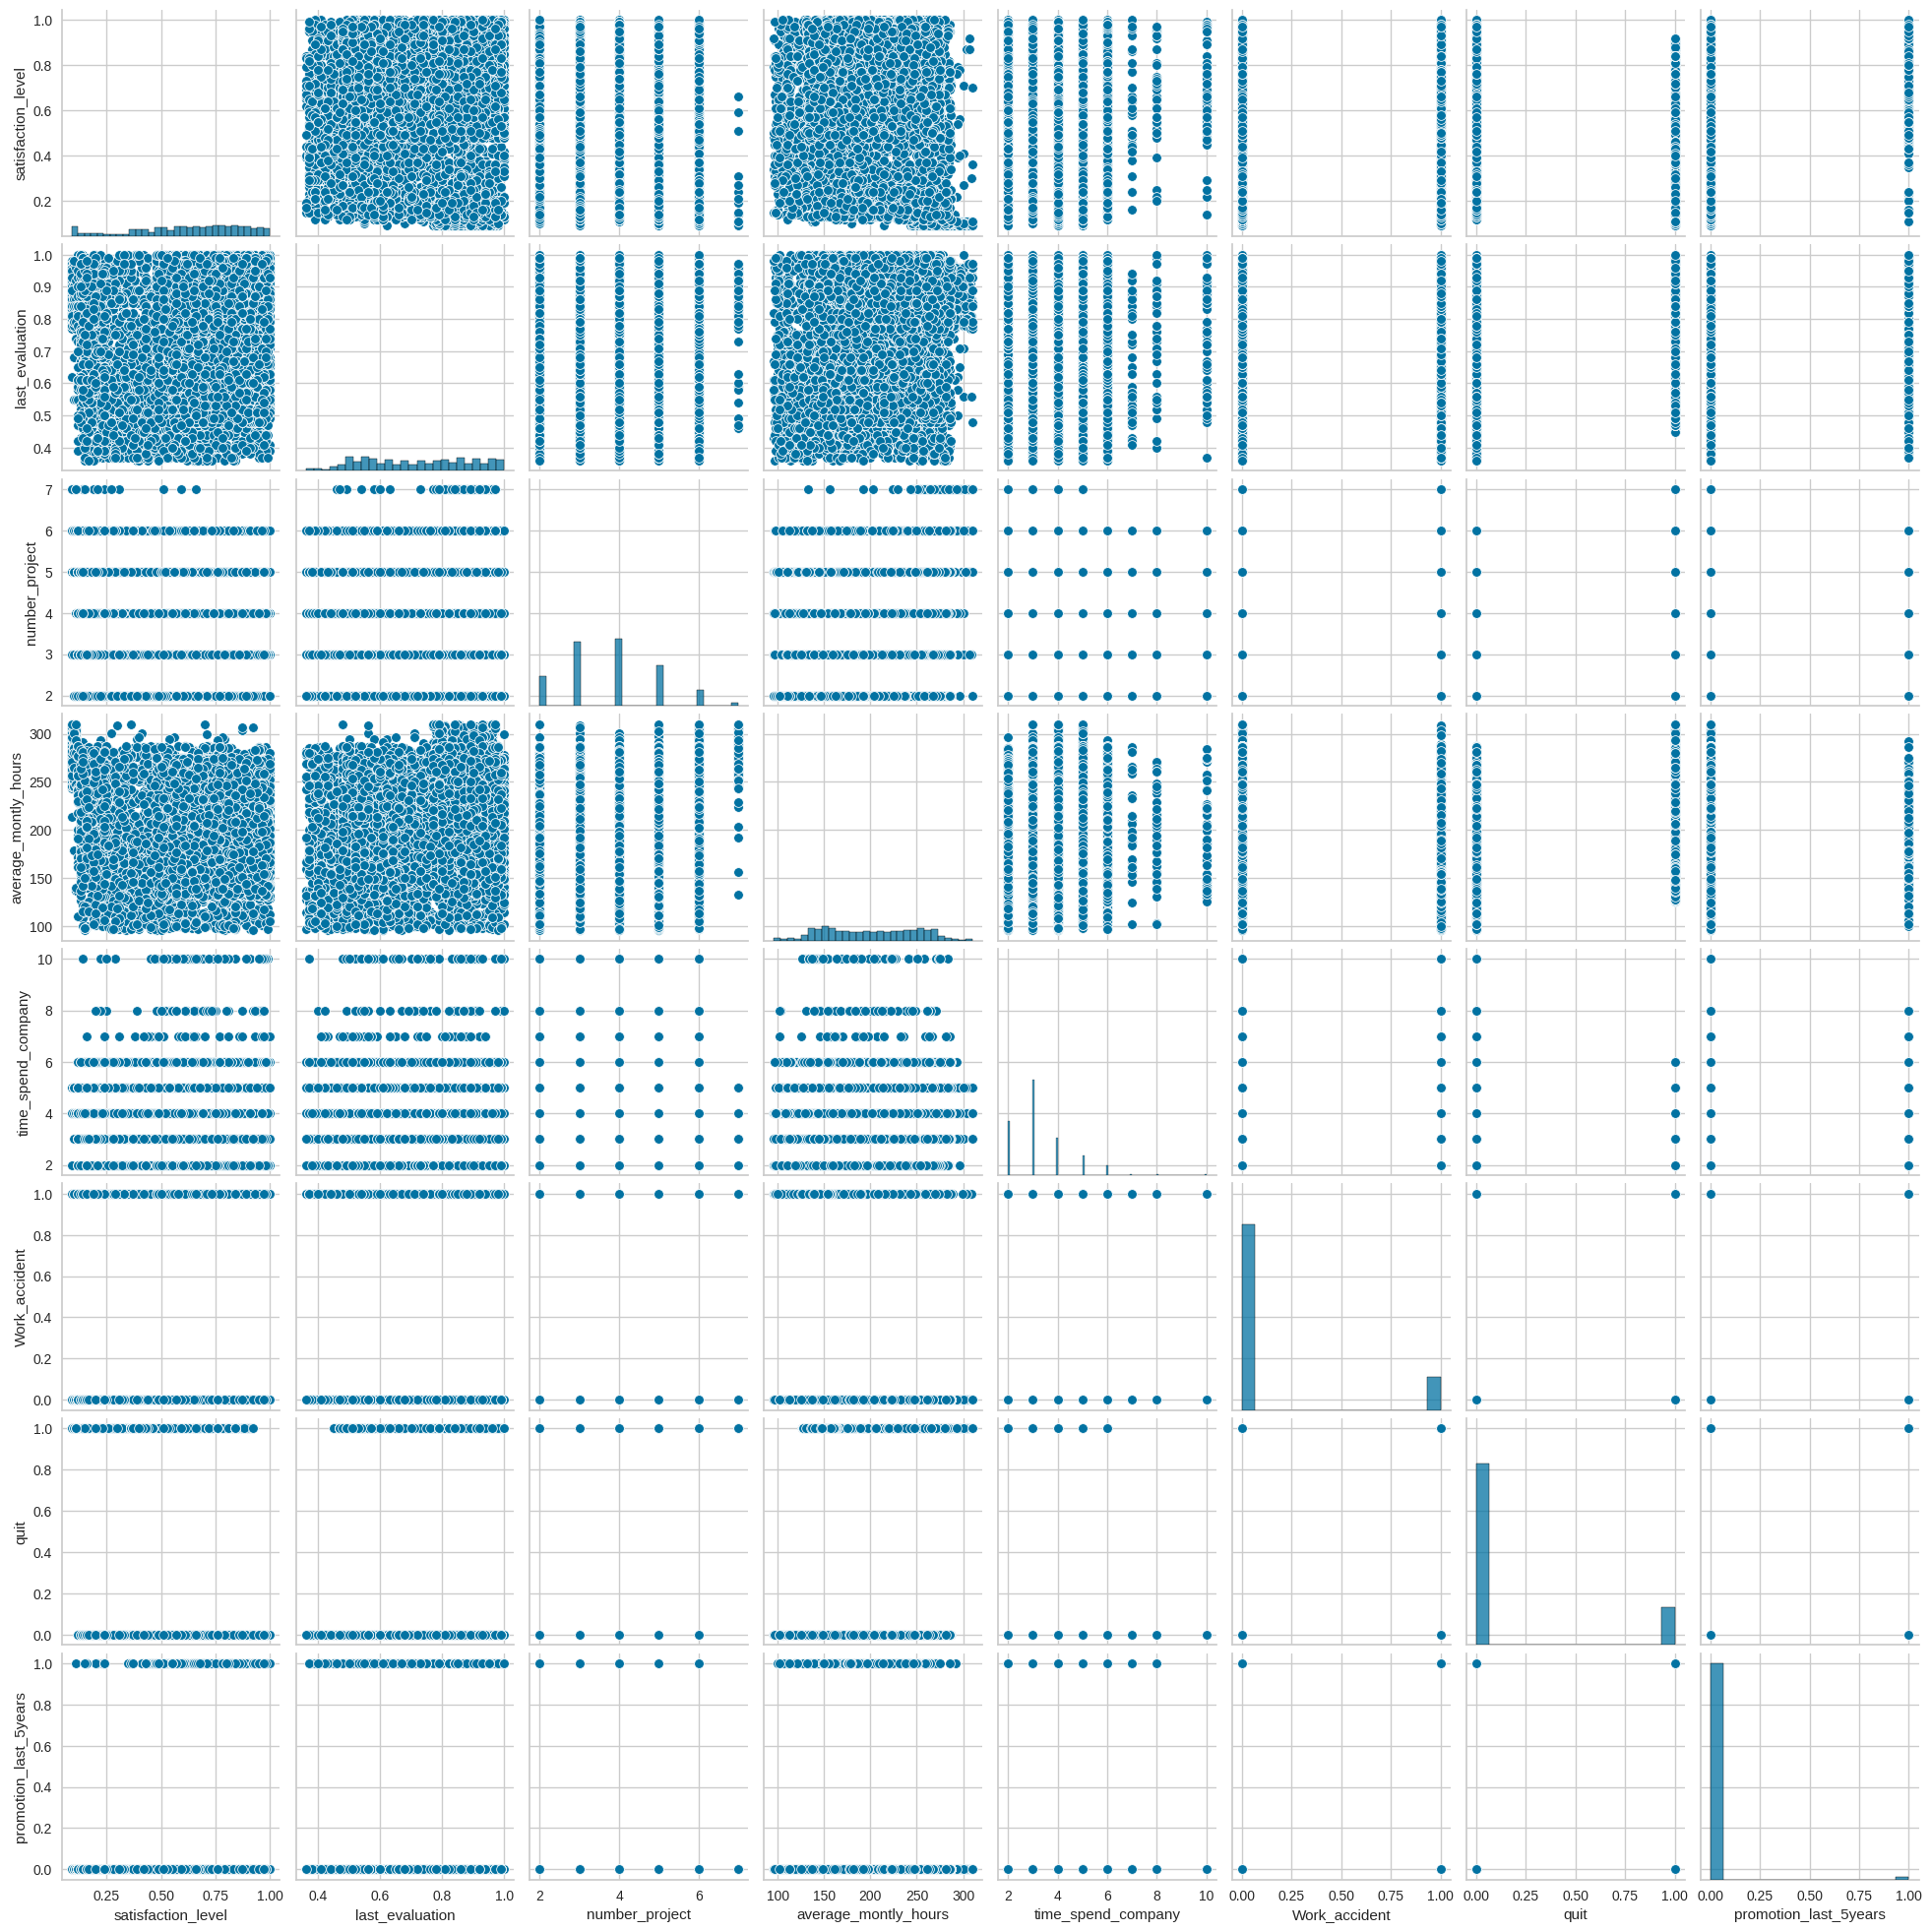

In [51]:
sns.pairplot(df)

<Axes: >

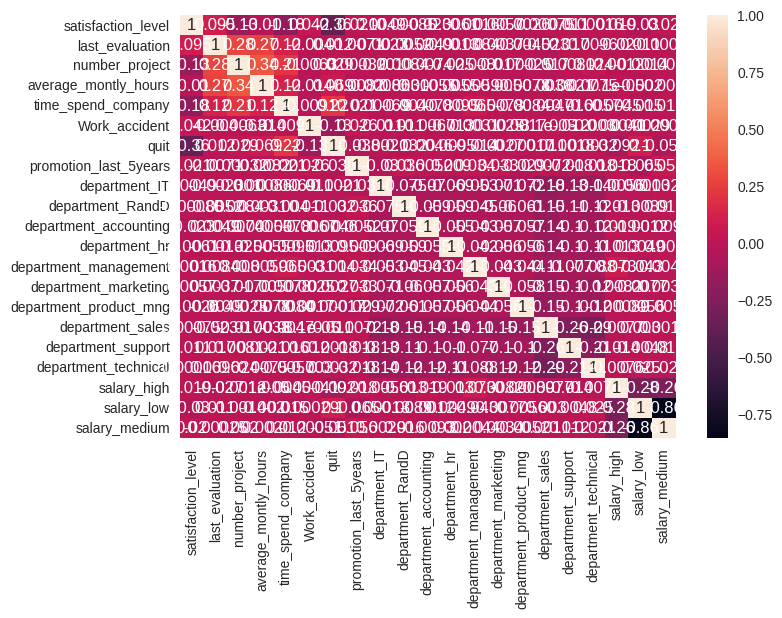

In [52]:
sns.heatmap(df.processed.corr(), annot=True)

<Axes: ylabel='count'>

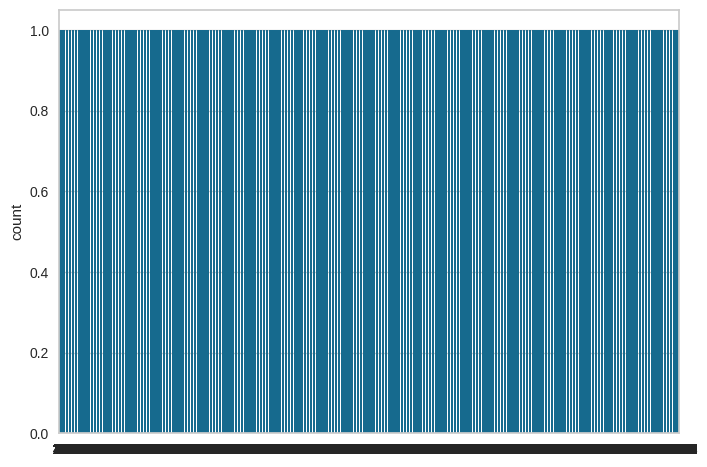

In [53]:
sns.countplot(df['quit'])

<Axes: xlabel='quit', ylabel='count'>

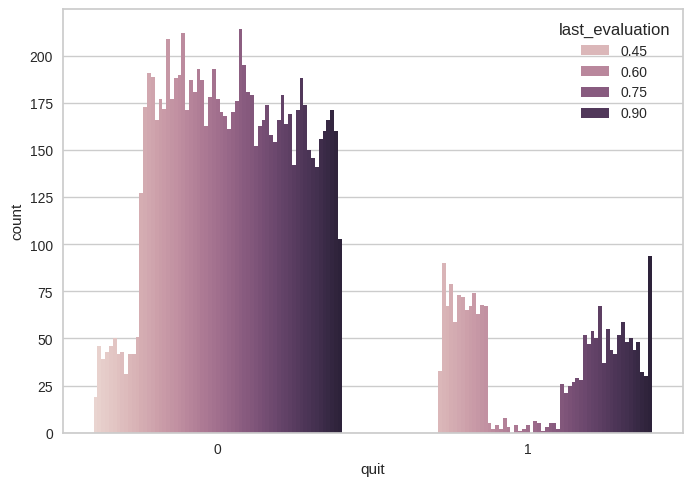

In [54]:
sns.countplot(x='quit', hue='last_evaluation', data=df)

<Axes: xlabel='quit', ylabel='count'>

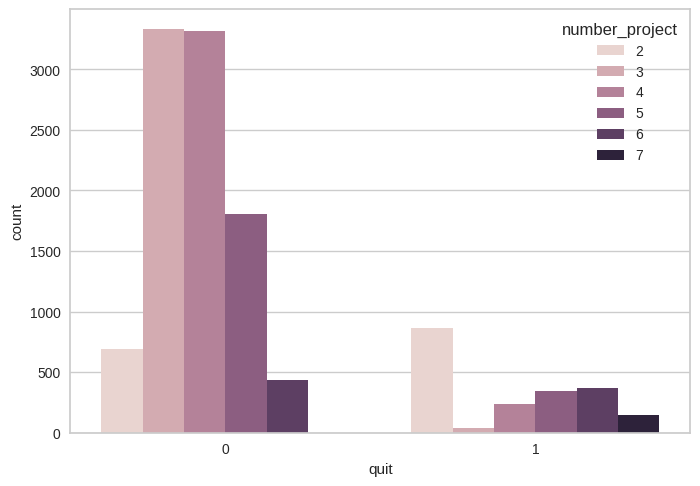

In [55]:
sns.countplot(x='quit', hue='number_project', data=df)

<Axes: xlabel='quit', ylabel='count'>

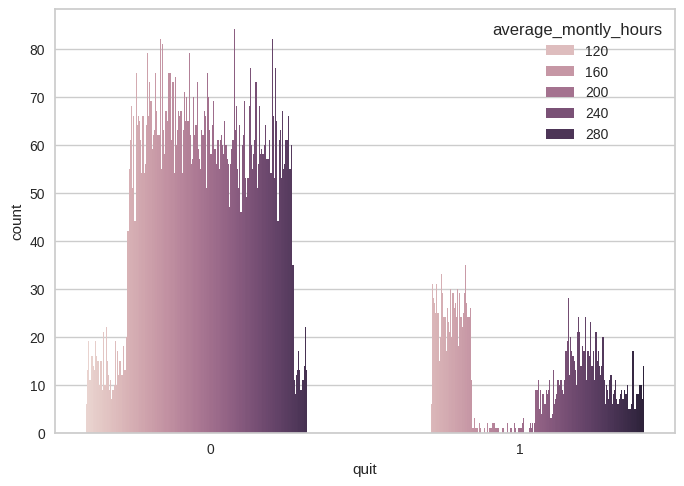

In [56]:
sns.countplot(x='quit', hue='average_montly_hours', data=df)

<Axes: xlabel='quit', ylabel='count'>

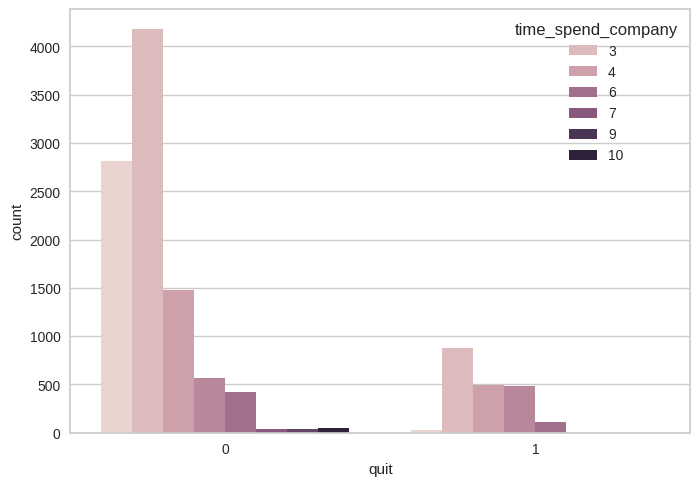

In [57]:
sns.countplot(x='quit', hue='time_spend_company', data=df)

<Axes: xlabel='quit', ylabel='count'>

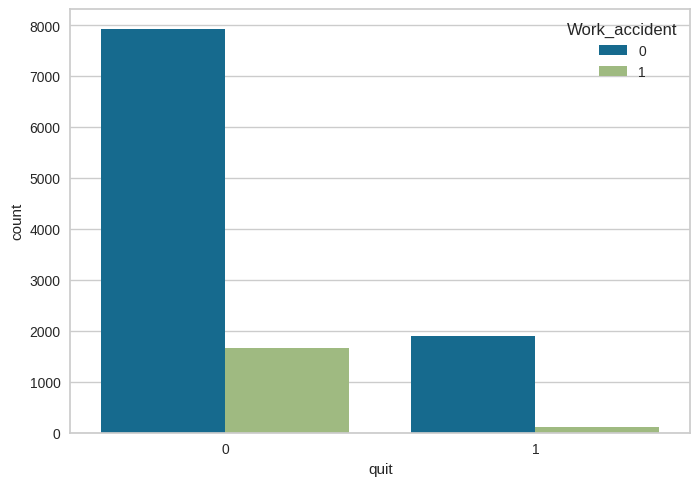

In [58]:
sns.countplot(x='quit', hue='Work_accident', data=df)

<Axes: xlabel='quit', ylabel='count'>

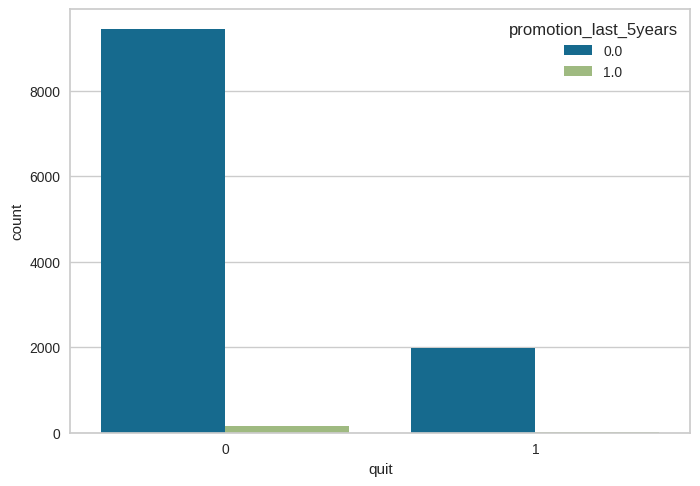

In [59]:
sns.countplot(x='quit', hue='promotion_last_5years', data=df)

<Axes: xlabel='quit', ylabel='count'>

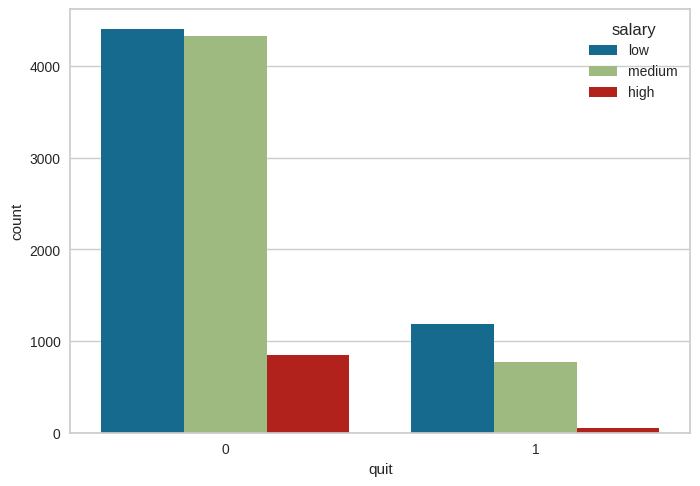

In [60]:
sns.countplot(x='quit', hue='salary', data=df)

<Axes: xlabel='quit', ylabel='count'>

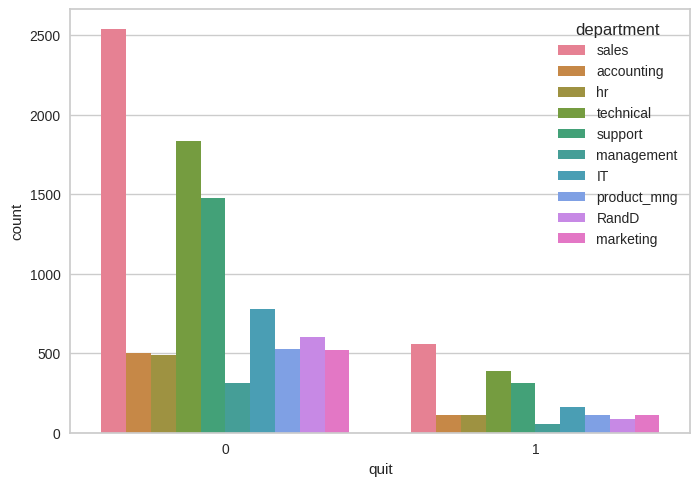

In [61]:
sns.countplot(x='quit', hue='department', data=df)

<Axes: xlabel='quit', ylabel='count'>

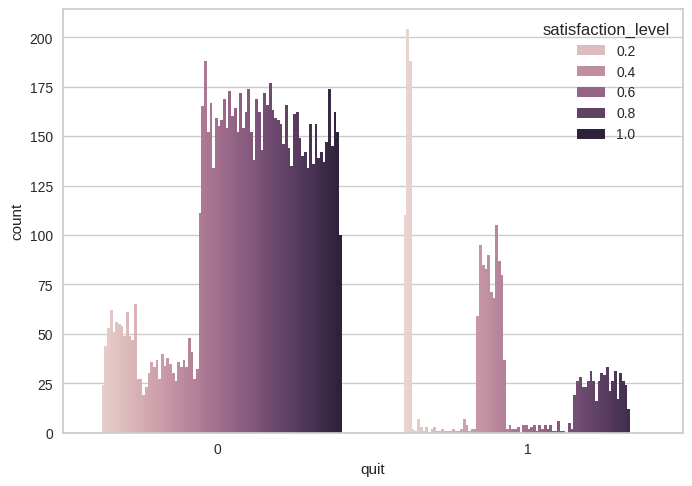

In [62]:
sns.countplot(x='quit', hue='satisfaction_level', data=df)

<Axes: xlabel='last_evaluation', ylabel='Count'>

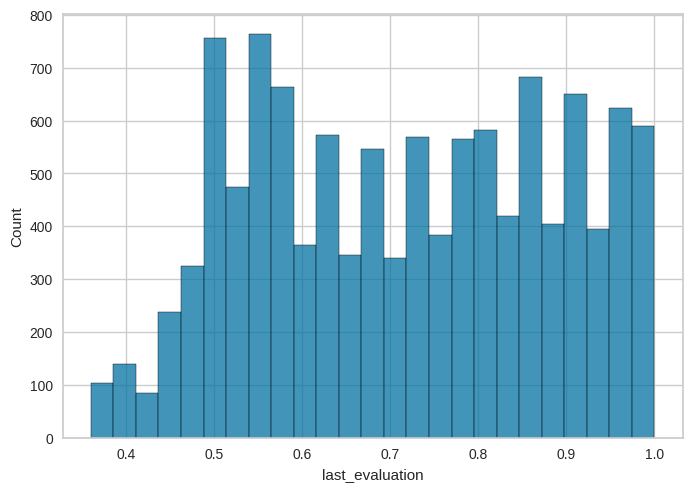

In [63]:
sns.histplot(df['last_evaluation'])

<Axes: xlabel='number_project', ylabel='Count'>

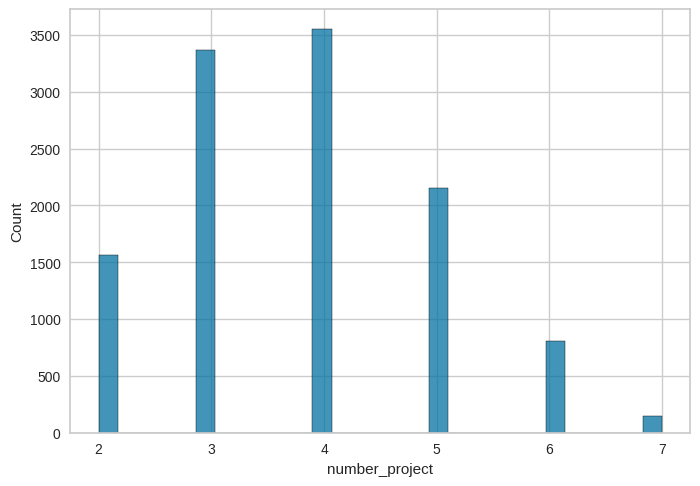

In [64]:
sns.histplot(df['number_project'])

<Axes: xlabel='average_montly_hours', ylabel='Count'>

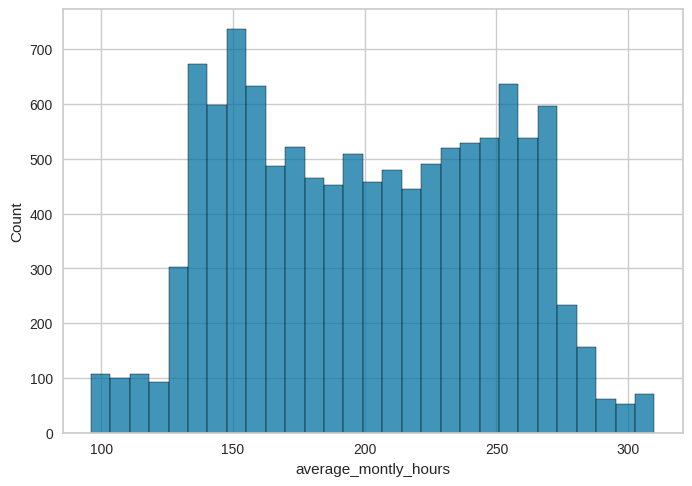

In [65]:
sns.histplot(df['average_montly_hours'])

<Axes: xlabel='time_spend_company', ylabel='Count'>

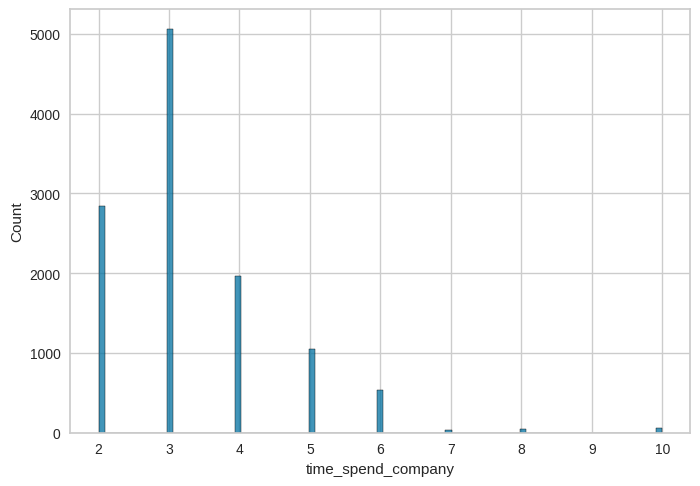

In [66]:
sns.histplot(df['time_spend_company'])

<Axes: xlabel='Work_accident', ylabel='Count'>

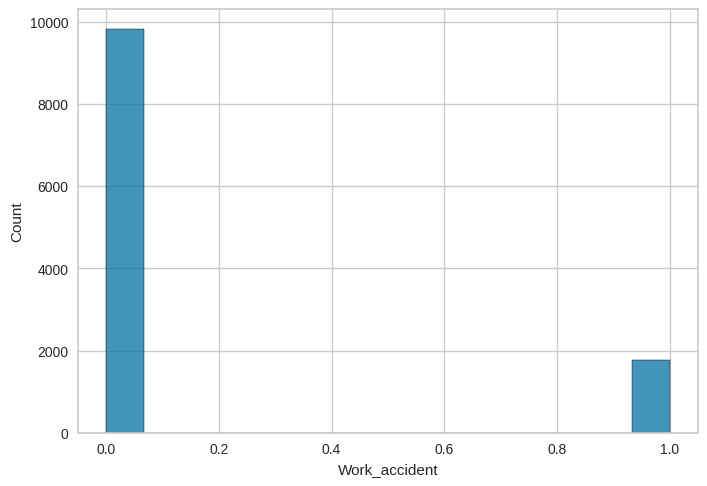

In [67]:
sns.histplot(df['Work_accident'])

<Axes: xlabel='promotion_last_5years', ylabel='Count'>

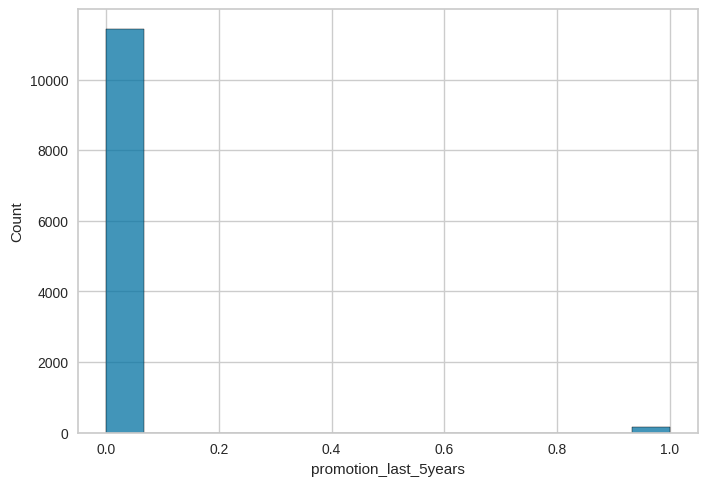

In [68]:
sns.histplot(df['promotion_last_5years'])

<Axes: xlabel='salary', ylabel='Count'>

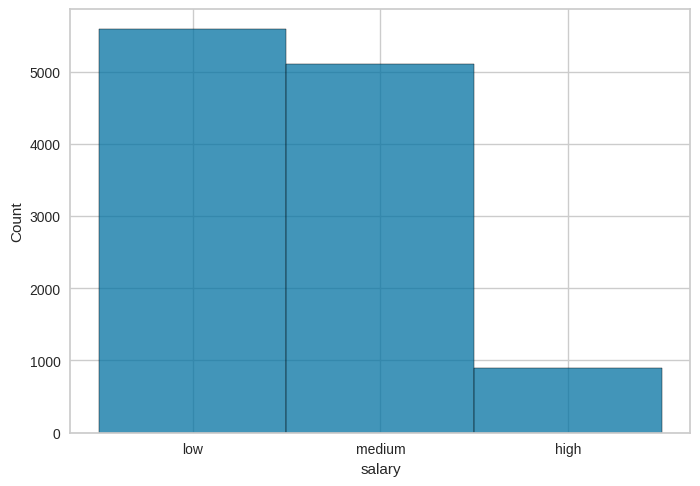

In [69]:
sns.histplot(df['salary'])

<Axes: xlabel='department', ylabel='Count'>

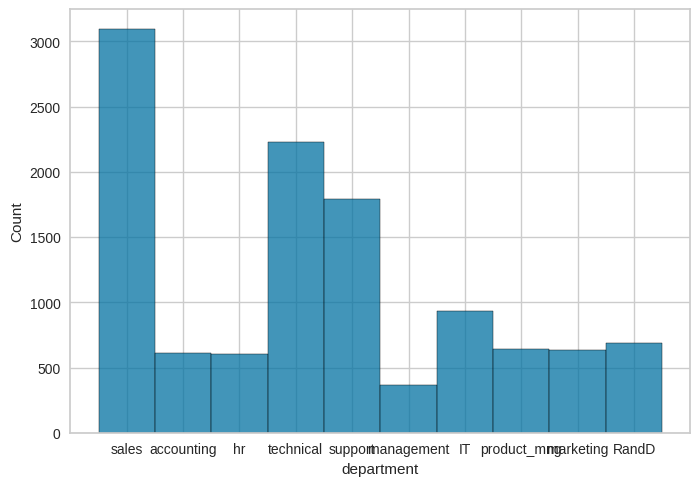

In [70]:
sns.histplot(df['department'])

<Axes: xlabel='quit', ylabel='Count'>

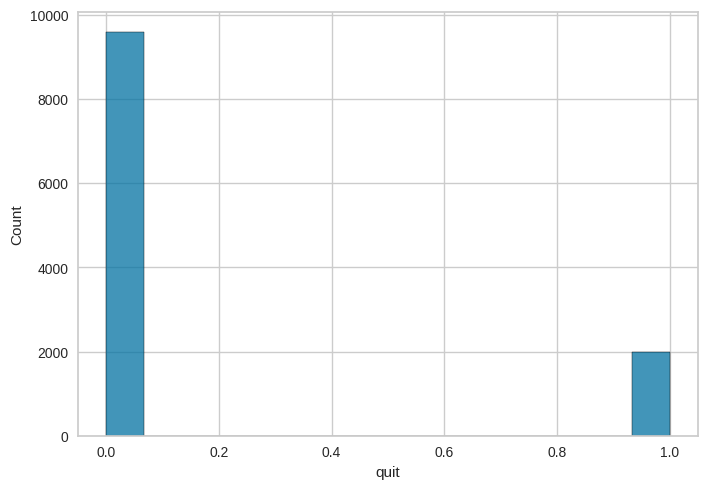

In [71]:
sns.histplot(df['quit'])

<Axes: xlabel='satisfaction_level', ylabel='Count'>

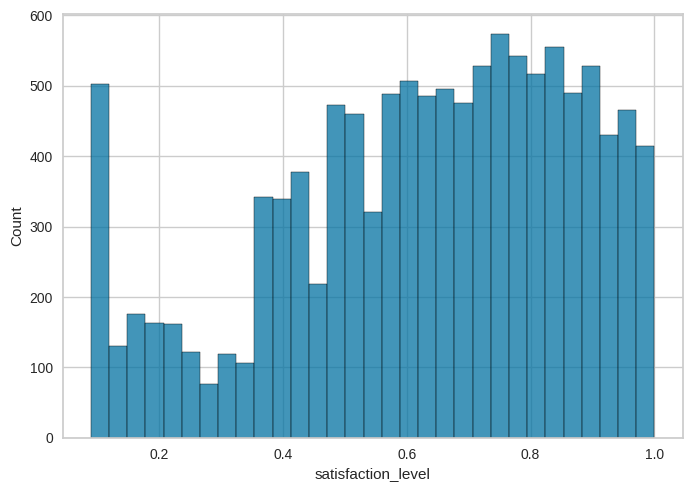

In [72]:
sns.histplot(df['satisfaction_level'])

<Axes: xlabel='salary', ylabel='last_evaluation'>

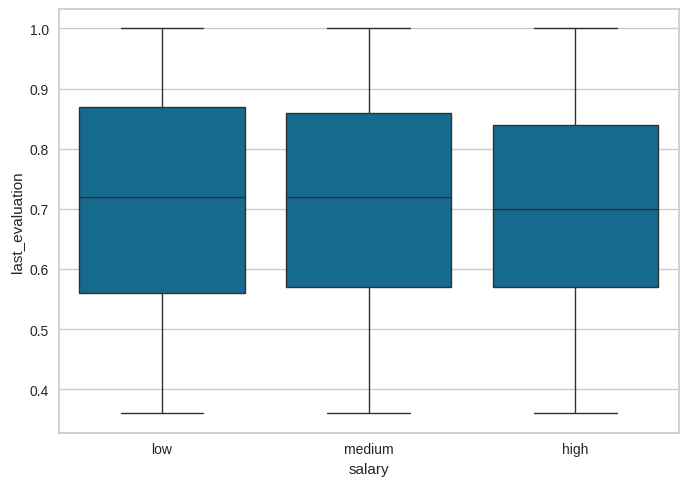

In [73]:
sns.boxplot(data = df , y = "last_evaluation"  , x = "salary")

In [74]:
total_without_out = df["last_evaluation"].drop(out_indices["last_evaluation"] )

<Axes: ylabel='last_evaluation'>

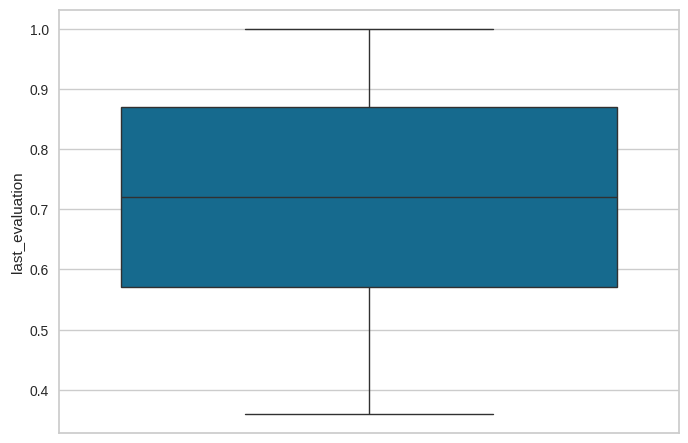

In [75]:
sns.boxplot(total_without_out)

<Axes: xlabel='time_spend_company', ylabel='Count'>

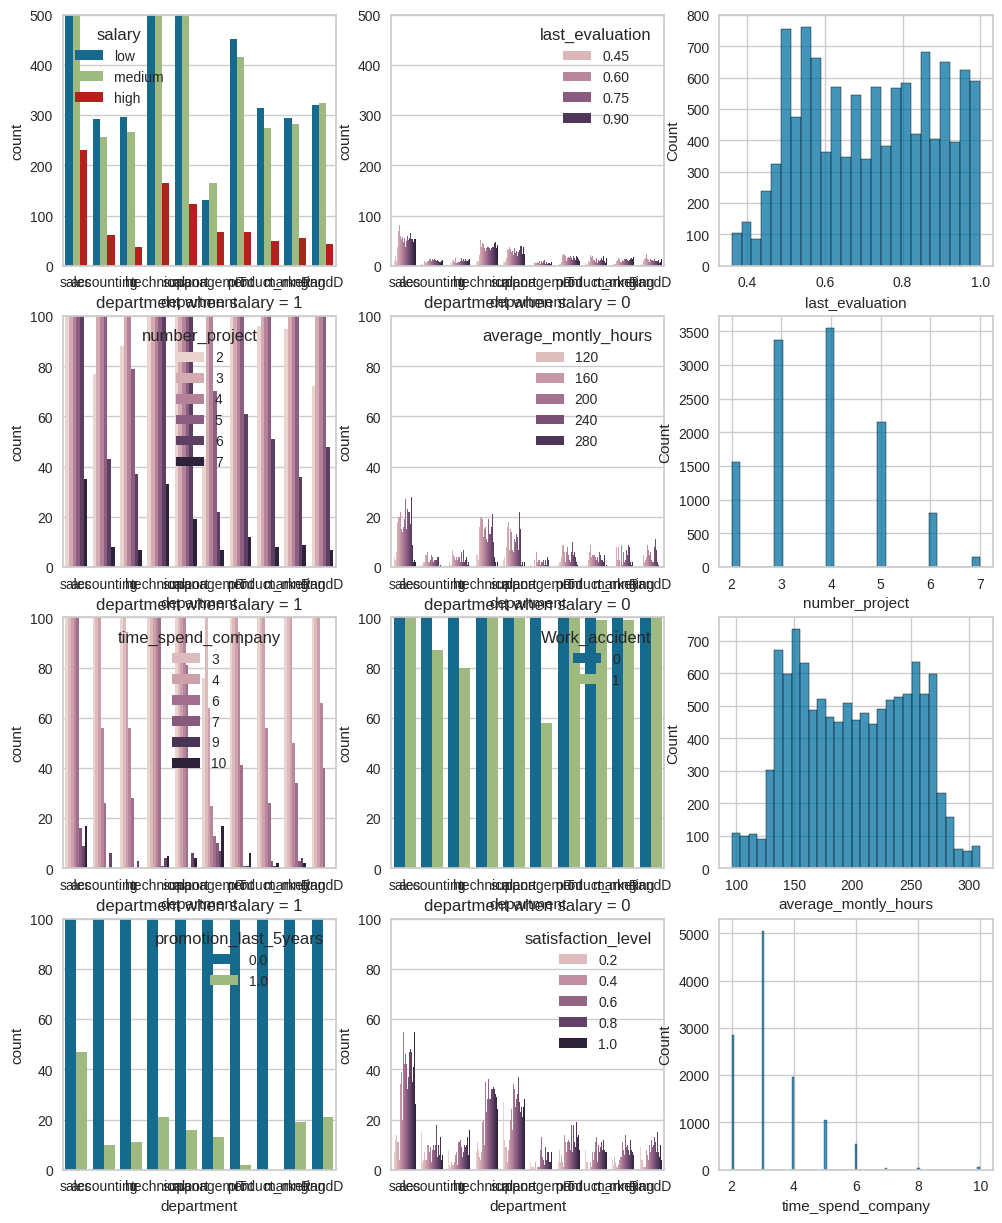

In [76]:
fig , axes    = plt.subplots(4 , 3 , figsize=(12,15))

sns.countplot(x = "department"  , hue = "salary" , data = df , ax = axes[0,0] )
axes[0,0].set(ylim = (0,500))
sns.countplot(x = "department"  , hue = "last_evaluation" , data = df , ax = axes[0,1] )
axes[0,1].set(ylim = (0,500))
axes[1,0].set(title = "department when salary = 1"  , ylim = (0,100))
sns.countplot(x = "department"  , hue = "number_project" , data = df , ax = axes[1,0] )
axes[1,1].set(title = "department when salary = 0" ,ylim = (0,100) )
sns.countplot(x = "department"  , hue = "average_montly_hours" , data = df , ax = axes[1,1] )
axes[2,0].set(title = "department when salary = 1"  , ylim = (0,100))
sns.countplot(x = "department"  , hue = "time_spend_company" , data = df , ax = axes[2,0] )
axes[2,1].set(title = "department when salary = 0" ,ylim = (0,100) )
sns.countplot(x = "department"  , hue = "Work_accident" , data = df , ax = axes[2,1] )
axes[3,0].set(title = "department when salary = 1"  , ylim = (0,100))
sns.countplot(x = "department"  , hue = "promotion_last_5years" , data = df , ax = axes[3,0] )
axes[3,1].set(title = "department when salary = 0" ,ylim = (0,100) )
sns.countplot(x = "department"  , hue = "satisfaction_level" , data = df , ax = axes[3,1] )
sns.histplot(df["last_evaluation"] , ax = axes[0,2])
sns.histplot(df["number_project"] , ax = axes[1,2])
sns.histplot(df["average_montly_hours"] , ax = axes[2,2])
sns.histplot(df["time_spend_company"] , ax = axes[3,2])

## Distribution Analysis

In [77]:
processed_num_stats = df.processed.describe().T
required_stats = ['mean', 'std']

for col in processed_num_stats.index:
    if col in df.processed.columns and all(stat in processed_num_stats.index for stat in required_stats):
        mean_val = processed_num_stats.loc['mean', col]
        std_val = processed_num_stats.loc['std', col]
        skewness = df.processed[col].skew()
        kurtosis = df.processed[col].kurtosis()

        print(f"\n   {col}:")
        print(f"      Mean: {mean_val:.2f}, Std: {std_val:.2f}")
        print(f"      Skewness: {skewness:.2f} ({'Right-skewed' if skewness > 0.5 else 'Left-skewed' if skewness < -0.5 else 'Approximately normal'})")
        print(f"      Kurtosis: {kurtosis:.2f} ({'Heavy-tailed' if kurtosis > 0 else 'Light-tailed'})")
    elif col not in df.processed.columns:
        print(f"\n   Skipping {col}: Column not found in df.processed")
    else:
        print(f"\n   Skipping {col}: Required statistics ('mean', 'std') not found in processed_num_stats index")


   Skipping satisfaction_level: Required statistics ('mean', 'std') not found in processed_num_stats index

   Skipping last_evaluation: Required statistics ('mean', 'std') not found in processed_num_stats index

   Skipping number_project: Required statistics ('mean', 'std') not found in processed_num_stats index

   Skipping average_montly_hours: Required statistics ('mean', 'std') not found in processed_num_stats index

   Skipping time_spend_company: Required statistics ('mean', 'std') not found in processed_num_stats index

   Skipping Work_accident: Required statistics ('mean', 'std') not found in processed_num_stats index

   Skipping quit: Required statistics ('mean', 'std') not found in processed_num_stats index

   Skipping promotion_last_5years: Required statistics ('mean', 'std') not found in processed_num_stats index


# Data Visualizations

**a) Histogram**

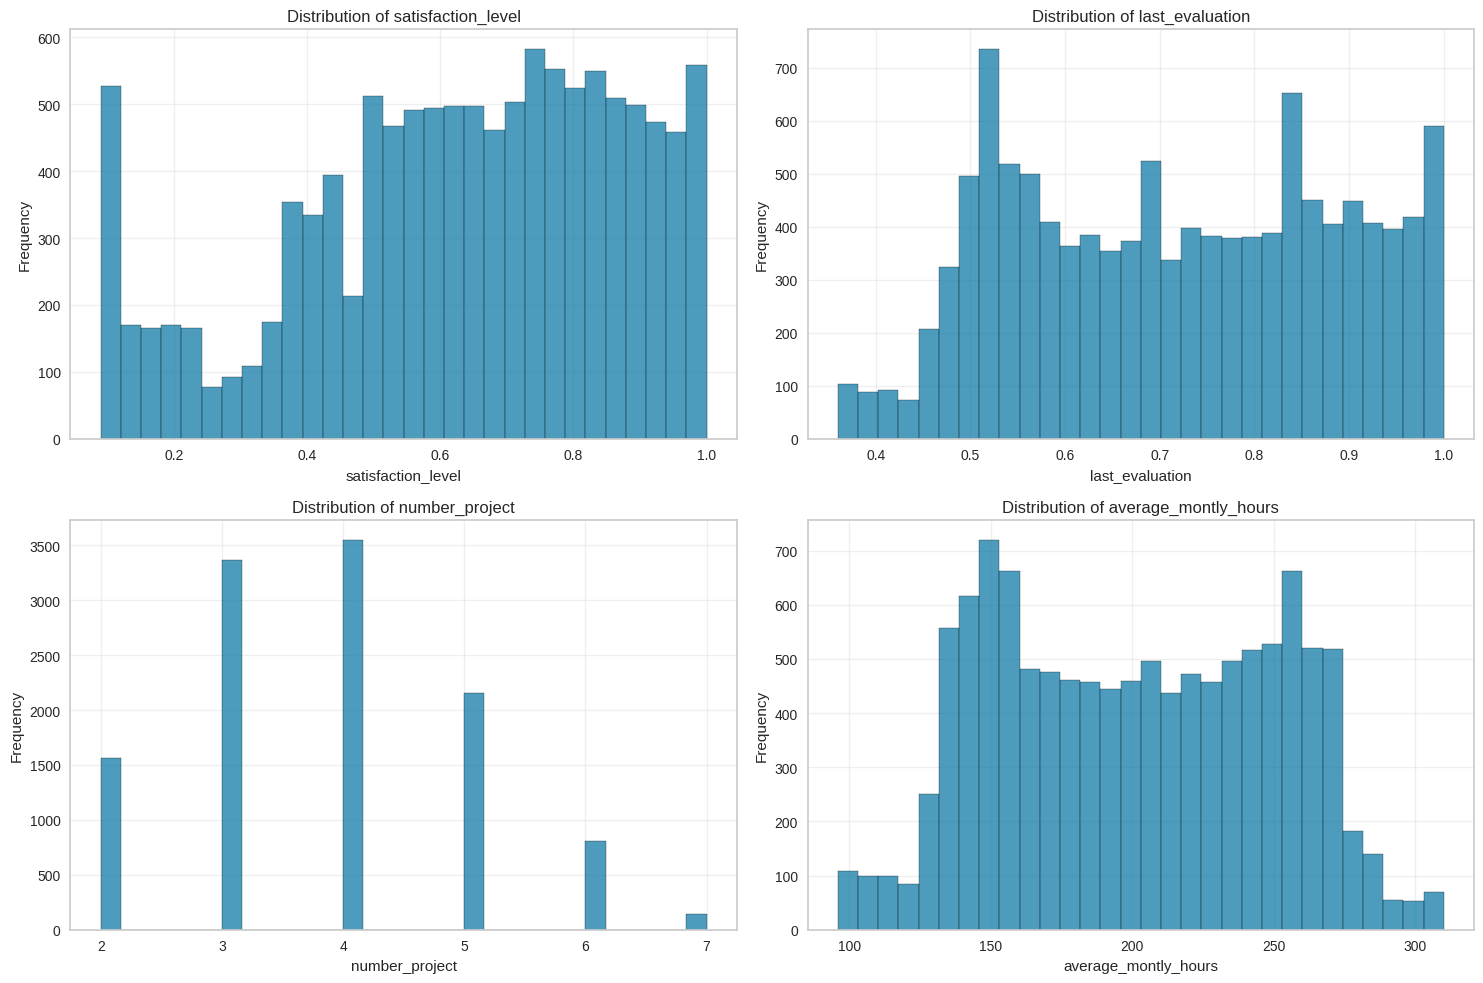

In [78]:
numeric_cols = df.processed.select_dtypes(include=[np.number]).columns[:5]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    if i < len(axes):

        df.processed[col].hist(bins=30, ax=axes[i], alpha=0.7, edgecolor='black')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

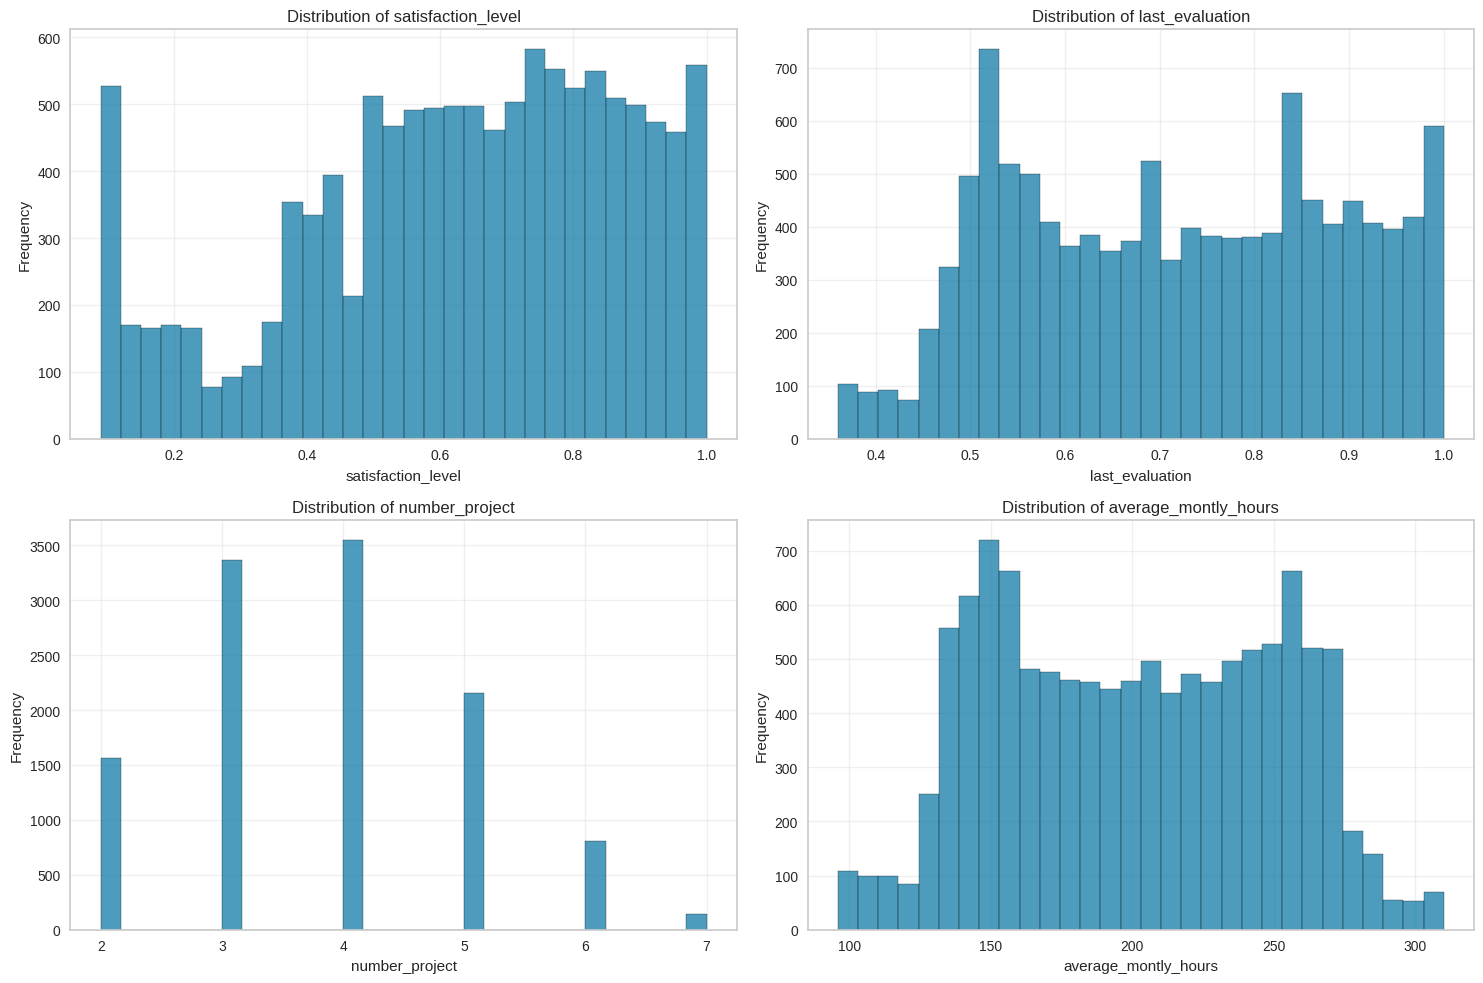

In [79]:
numeric_cols = df.processed.select_dtypes(include=[np.number]).columns[:5]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    if i <4:

        df.processed[col].hist(bins=30, ax=axes[i], alpha=0.7, edgecolor='black')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

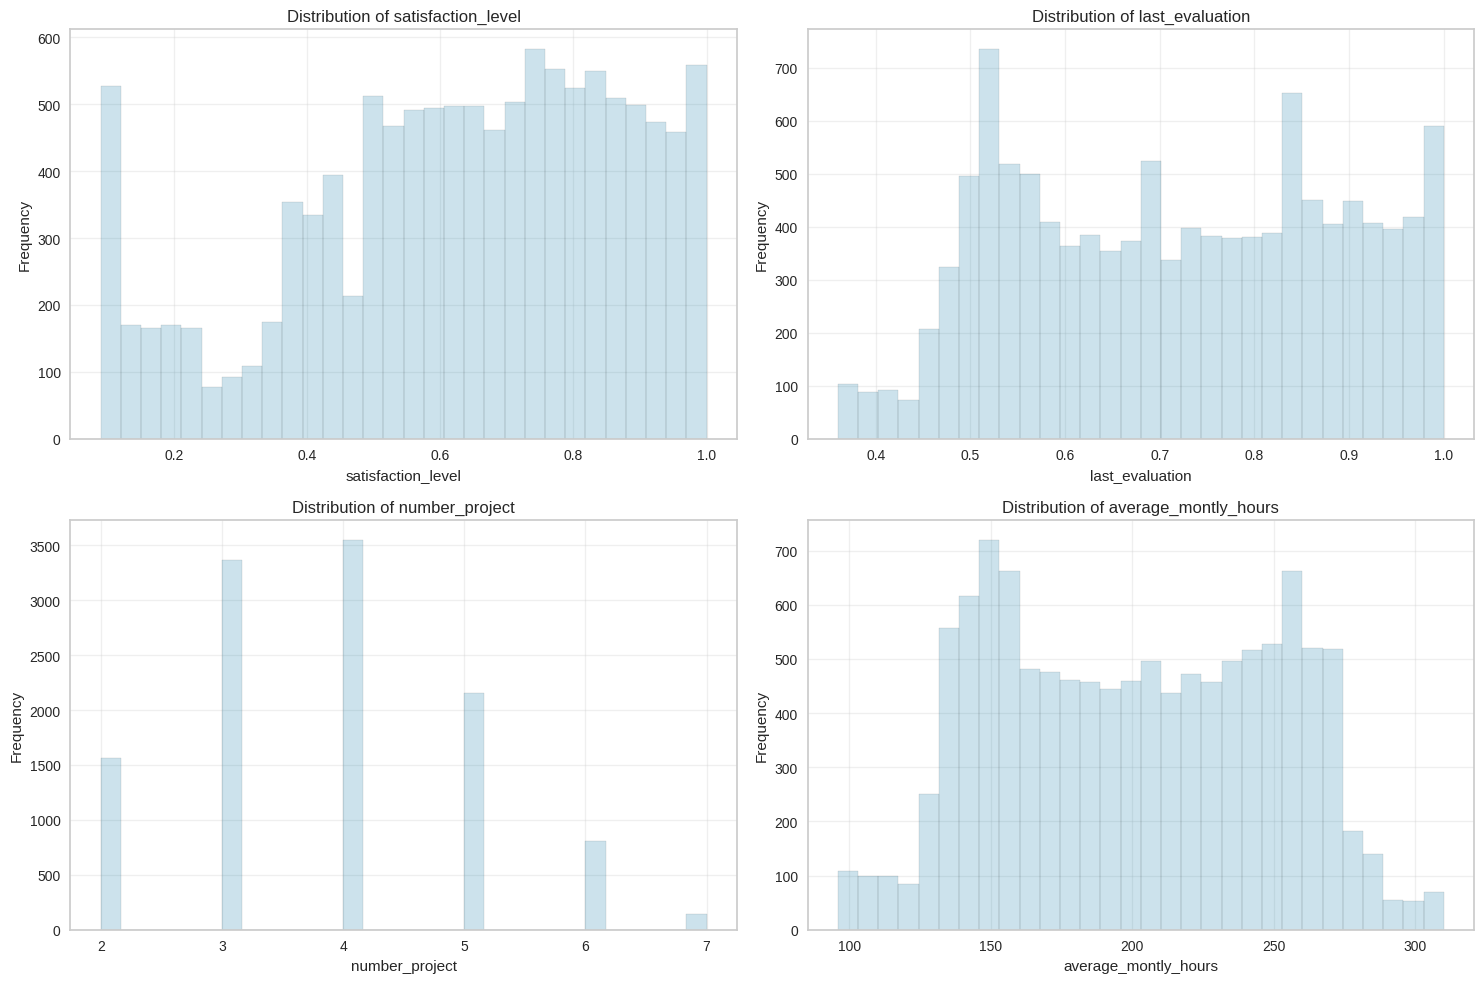

In [80]:
numeric_cols = df.processed.select_dtypes(include=[np.number]).columns[:5]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    if i < len(axes):

        df.processed[col].hist(bins=30, ax=axes[i], alpha=0.2, edgecolor='black')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [81]:
global_mean = df["last_evaluation"].mean()
global_mean

np.float64(0.7166076670695908)

In [82]:
inter_mean = df.groupby("department")["last_evaluation"].mean()
inter_mean

department
IT             0.715283
RandD          0.713149
accounting     0.720147
hr             0.715691
management     0.724438
marketing      0.719210
product_mng    0.713433
sales          0.710191
support        0.723156
technical      0.719946
Name: last_evaluation, dtype: float64

In [83]:
risk_ratio = inter_mean/global_mean
risk_ratio

department
IT             0.998152
RandD          0.995174
accounting     1.004939
hr             0.998720
management     1.010927
marketing      1.003632
product_mng    0.995569
sales          0.991046
support        1.009139
technical      1.004659
Name: last_evaluation, dtype: float64

# Task 3) Encode Categorical Features

In [84]:
salary_dummies = pd.get_dummies(df['salary'], prefix='Salary')
print(f"\nSalary dummy variables:")
print(salary_dummies.head())


Salary dummy variables:
   Salary_high  Salary_low  Salary_medium
0        False        True          False
1        False       False           True
2        False       False           True
3        False        True          False
4        False        True          False


In [86]:
dept_dummies = pd.get_dummies(df['department'], prefix='department', prefix_sep='_')
df_encoded_pandas = pd.concat([df.drop(['department', 'salary'], axis=1),
                              dept_dummies, salary_dummies], axis=1)


In [87]:
df_encoded_pandas.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  quit  promotion_last_5years  \
0                   3              0     1                    0.0   
1                   6              0     1                    0.0   
2                   4              0     1                    0.0   
3                   5              0     1                    0.0   
4                   3              0     1                    0.0   

   department_IT  department_RandD  ...  department_hr  department_management  \
0          False             False  ...          False                  False   
1          False             False  ...          False                  False   
2          False             False  ...          False                  False   
3          False             False  ...          False                  False   
4          False             False  ...          False                  False   

   department_marketing  department_product_mng  department_sales  \
0                 False                   False              True   
1                 False                   False              True   
2                 False                   False              True   
3                 False                   False              True   
4                 False                   False              True   

   department_support  department_technical  Salary_high  Salary_low  \
0               False                 False        False        True   
1               False                 False        False       False   
2               False                 False        False       False   
3               False                 False        False        True   
4               False                 False        False        True   

   Salary_medium  
0          False  
1           True  
2           True  
3          False  
4          False  

[5 rows x 21 columns]

In [88]:
df_encoded_pandas.shape

(11582, 21)

In [89]:
from sklearn.preprocessing import OneHotEncoder , LabelEncoder

In [90]:
encoder = OneHotEncoder(sparse_output=False, drop='first')

In [91]:
encoded_df = encoder.fit_transform(df[['department', 'salary']])

In [92]:
feature_names = encoder.get_feature_names_out()

In [93]:
df_encoded_sklearn = pd.DataFrame(encoded_df, columns=feature_names)

In [94]:
df_final_sklearn = pd.concat([df.drop(['department', 'salary'], axis=1).reset_index(drop=True),
                             df_encoded_sklearn], axis=1)

In [95]:
df_final_sklearn.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  quit  promotion_last_5years  \
0                   3              0     1                    0.0   
1                   6              0     1                    0.0   
2                   4              0     1                    0.0   
3                   5              0     1                    0.0   
4                   3              0     1                    0.0   

   department_RandD  department_accounting  ...  department_management  \
0               0.0                    0.0  ...                    0.0   
1               0.0                    0.0  ...                    0.0   
2               0.0                    0.0  ...                    0.0   
3               0.0                    0.0  ...                    0.0   
4               0.0                    0.0  ...                    0.0   

   department_marketing  department_product_mng  department_sales  \
0                   0.0                     0.0               1.0   
1                   0.0                     0.0               1.0   
2                   0.0                     0.0               1.0   
3                   0.0                     0.0               1.0   
4                   0.0                     0.0               1.0   

   department_support  department_technical  department_nan  salary_low  \
0                 0.0                   0.0             0.0         1.0   
1                 0.0                   0.0             0.0         0.0   
2                 0.0                   0.0             0.0         0.0   
3                 0.0                   0.0             0.0         1.0   
4                 0.0                   0.0             0.0         1.0   

   salary_medium  salary_nan  
0            0.0         0.0  
1            1.0         0.0  
2            1.0         0.0  
3            0.0         0.0  
4            0.0         0.0  

[5 rows x 21 columns]

In [96]:
df_final_sklearn.shape

(11582, 21)

# Task 4 ) Visualize Class Imbalance

In [98]:

df.dropna(inplace=True)

X = df.drop('quit', axis=1)
y = df['quit']

X = pd.get_dummies(X, drop_first=True)

In [99]:
print(df.shape)

(11581, 10)


In [100]:
print(X.shape)

(11581, 18)


In [101]:
print(y.shape)

(11581,)


In [102]:
class_counts = y.value_counts()
class_counts

quit
0    9581
1    2000
Name: count, dtype: int64

In [103]:
from collections import Counter

class_counts = Counter(y)
total_samples = len(y)
class_imbalance = {class_label: count / total_samples for class_label, count in class_counts.items()}

In [104]:
for class_label, count in class_counts.items():
    percentage = (count / total_samples) * 100
    print(f"Class {class_label}: {count} samples ({percentage:.2f}%)")

Class 1: 2000 samples (17.27%)
Class 0: 9581 samples (82.73%)


In [105]:
majority_class = max(class_counts.values())
minority_class = min(class_counts.values())
imbalance_ratio = majority_class / minority_class

In [106]:
print(f"\nImbalance Ratio: {imbalance_ratio:.2f}:1")


Imbalance Ratio: 4.79:1


In [107]:
print(f"Minority class percentage: {(minority_class/total_samples)*100:.2f}%")

Minority class percentage: 17.27%


In [108]:
print(f"Majority class percentage: {(majority_class/total_samples)*100:.2f}%")

Majority class percentage: 82.73%


In [109]:
if imbalance_ratio > 1.5:
    imbalance_severity = "MODERATE" if imbalance_ratio <= 4 else "SEVERE" if imbalance_ratio <= 9 else "EXTREME"
    print(f"Class imbalance detected: {imbalance_severity} imbalance")
    needs_sampling = True
else:
    print("No significant class imbalance detected")
    needs_sampling = False

Class imbalance detected: SEVERE imbalance


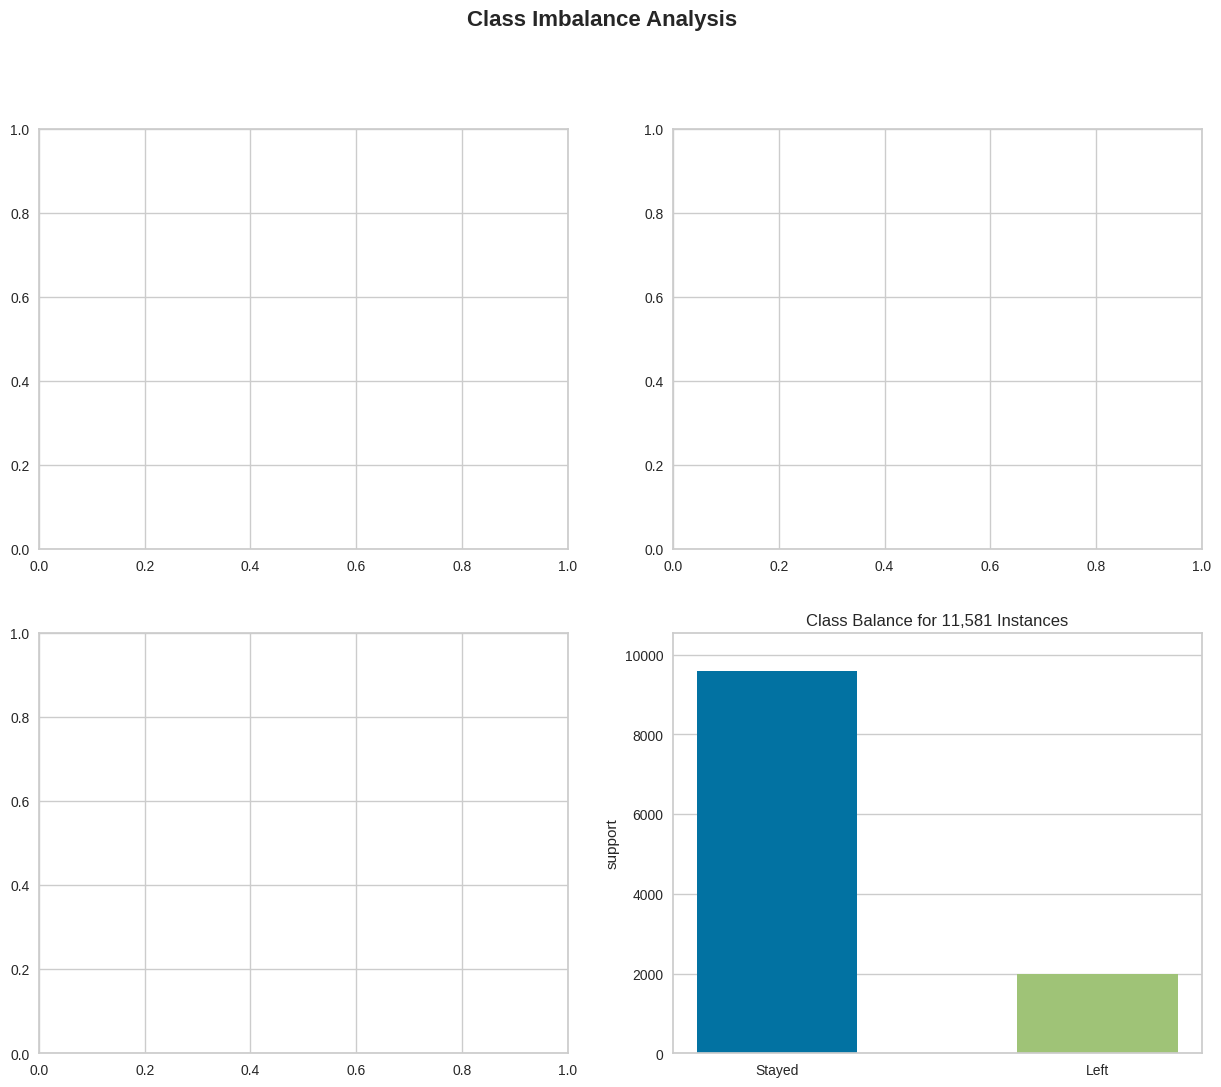

In [110]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Class Imbalance Analysis', fontsize=16, fontweight='bold')
visualizer = ClassBalance(labels=['Stayed', 'Left'])
visualizer.fit(y)
visualizer.show(ax=axes[0, 0])
axes[0, 0].set_title('Yellowbrick Class Balance Visualizer')
axes[0, 1].bar(class_counts.keys(), class_counts.values(),
               color=['skyblue', 'salmon'], alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Class')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Class Frequency Distribution')
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(['Stayed (0)', 'Left (1)'])
for i, (class_label, count) in enumerate(class_counts.items()):
    axes[0, 1].text(i, count + 10, str(count), ha='center', va='bottom', fontweight='bold')



Pie chart


In [111]:
fig = plt.figure(figsize=(16, 12))

<Figure size 1600x1200 with 0 Axes>

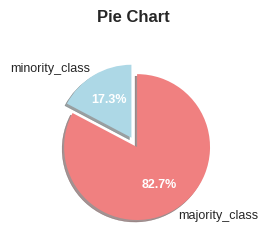

In [112]:
ax1 = plt.subplot(2, 3, 1)
labels = ['minority_class', 'majority_class']
sizes = list(class_counts.values())
colors = ['lightblue', 'lightcoral']
explode = (0.05, 0.1)
wedges, texts, autotexts = ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True, textprops={'fontsize': 9})

ax1.set_title('Pie Chart', fontsize=12, fontweight='bold', pad=20)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')



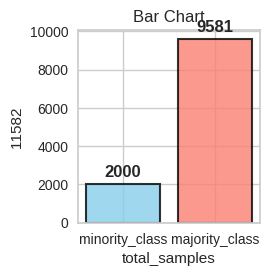

In [113]:
ax2 = plt.subplot(2, 3, 2)
bars = ax2.bar(range(len(class_counts)), list(class_counts.values()),
               color=['skyblue', 'salmon'], alpha=0.8, edgecolor='black', linewidth=1.5)

ax2.set_xlabel('total_samples')
ax2.set_ylabel('11582')
ax2.set_title('Bar Chart')
ax2.set_xticks(range(len(class_counts)))
ax2.set_xticklabels(['minority_class', 'majority_class'])
for bar in bars:
    height = bar.get_height()
    ax2.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontweight='bold')


In [114]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

In [115]:
train_counts = Counter(y_train)
for class_label, count in train_counts.items():
    percentage = (count / len(y_train)) * 100
    print(f"Class {class_label}: {count} samples ({percentage:.2f}%)")


Class 0: 7664 samples (82.73%)
Class 1: 1600 samples (17.27%)


In [116]:
sampling_results = {}

Random Oversampling

In [117]:
ros = RandomOverSampler(random_state=42)
X_train_RandomOverSampler, y_train_RandomOverSampler = ros.fit_resample(X_train, y_train)
ros_counts = Counter(y_train_RandomOverSampler)
sampling_results['Random Oversampling'] = (X_train_RandomOverSampler, y_train_RandomOverSampler, ros_counts)

In [118]:
for class_label, count in ros_counts.items():
        percentage = (count / len(y_train_RandomOverSampler)) * 100
        print(f"Class {class_label}: {count} samples ({percentage:.2f}%)")

Class 0: 7664 samples (50.00%)
Class 1: 7664 samples (50.00%)


SMOTE

In [119]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
smote_counts = Counter(y_train_smote)
sampling_results['SMOTE'] = (X_train_smote, y_train_smote, smote_counts)

In [120]:
for class_label, count in smote_counts.items():
        percentage = (count / len(y_train_smote)) * 100
        print(f"Class {class_label}: {count} samples ({percentage:.2f}%)")

Class 0: 7664 samples (50.00%)
Class 1: 7664 samples (50.00%)


Random Undersampling

In [121]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
rus_counts = Counter(y_train_rus)
sampling_results['Random Undersampling'] = (X_train_rus, y_train_rus, rus_counts)

In [122]:
for class_label, count in rus_counts.items():
        percentage = (count / len(y_train_rus)) * 100
        print(f"Class {class_label}: {count} samples ({percentage:.2f}%)")

Class 0: 1600 samples (50.00%)
Class 1: 1600 samples (50.00%)


SMOTE + Tomek

In [123]:
smote_tomek = SMOTETomek(random_state=42)
X_train_st, y_train_st = smote_tomek.fit_resample(X_train, y_train)
st_counts = Counter(y_train_st)
sampling_results['SMOTE + Tomek'] = (X_train_st, y_train_st, st_counts)

In [124]:
for class_label, count in st_counts.items():
        percentage = (count / len(y_train_st)) * 100
        print(f"Class {class_label}: {count} samples ({percentage:.2f}%)")

Class 0: 7626 samples (50.00%)
Class 1: 7626 samples (50.00%)


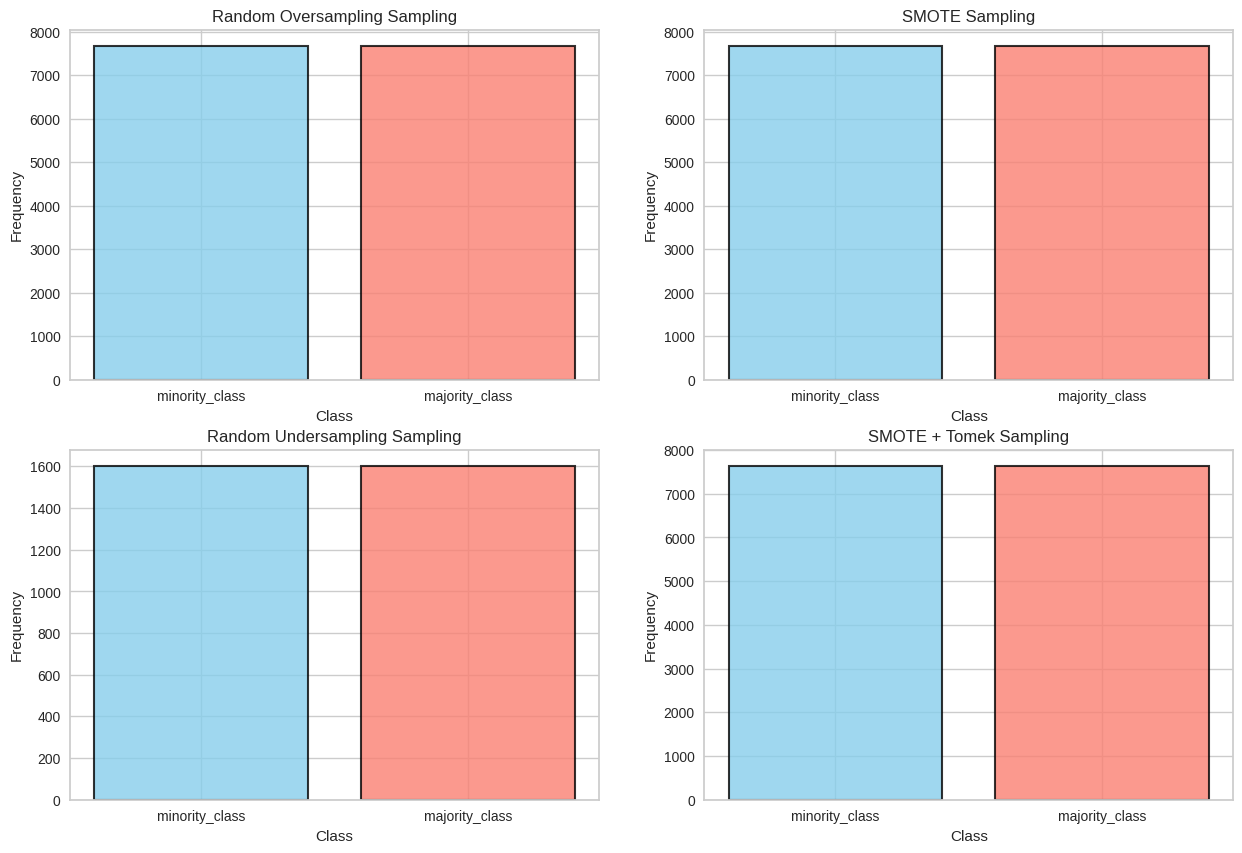

In [125]:
fig , axes = plt.subplots(2 , 2 , figsize = (15 , 10))
axes = axes.flatten()
for i , (name , (X_resampled , y_resampled , counts)) in enumerate(sampling_results.items()):
    axes[i].bar(counts.keys() , counts.values() , color = ['skyblue' , 'salmon'] , alpha = 0.8 , edgecolor = 'black' , linewidth = 1.5)
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{name} Sampling')
    axes[i].set_xticks([0 , 1])
    axes[i].set_xticklabels(['minority_class' , 'majority_class'])




# Task 5: Create Training and Validation Sets
    

In [126]:
X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y )

In [127]:
print(f"Training set: {X_train.shape[0]} ({(X_train.shape[0]/total_samples)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} ({(X_val.shape[0]/total_samples)*100:.1f}%)")

Training set: 9264 (80.0%)
Validation set: 2317 (20.0%)


In [128]:
train_counts = Counter(y_train)
for class_label, count in train_counts.items():
    percentage = (count / len(y_train)) * 100
    class_name = 'minority_class'  if class_label  ==  1 else 'majority_class'
    print(f"{class_label} ({class_name}): {count} ({percentage:.2f}%)")

0 (majority_class): 7664 (82.73%)
1 (minority_class): 1600 (17.27%)


In [129]:
val_counts = Counter(y_val)
for class_label, count in val_counts.items():
    percentage = (count / len(y_val)) * 100
    class_name = 'minority_class' if class_label == 0 else 'majority_class'
    print(f"{class_label} ({class_name}): {count} ({percentage:.2f}%)")

0 (minority_class): 1917 (82.74%)
1 (majority_class): 400 (17.26%)


In [130]:
from sklearn.model_selection import StratifiedShuffleSplit

In [131]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, val_index in sss.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]


In [132]:
sss_train_counts = Counter(y_train)
sss_val_counts = Counter(y_val)


In [133]:
print(f"train_test_split - Training: {dict(train_counts)}")
print(f"StratifiedShuffleSplit - Training: {dict(sss_train_counts)}")
print(f"{train_counts == sss_train_counts}")


train_test_split - Training: {0: 7664, 1: 1600}
StratifiedShuffleSplit - Training: {0: 7664, 1: 1600}
True


In [134]:
original_counts = Counter(df)


In [135]:
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

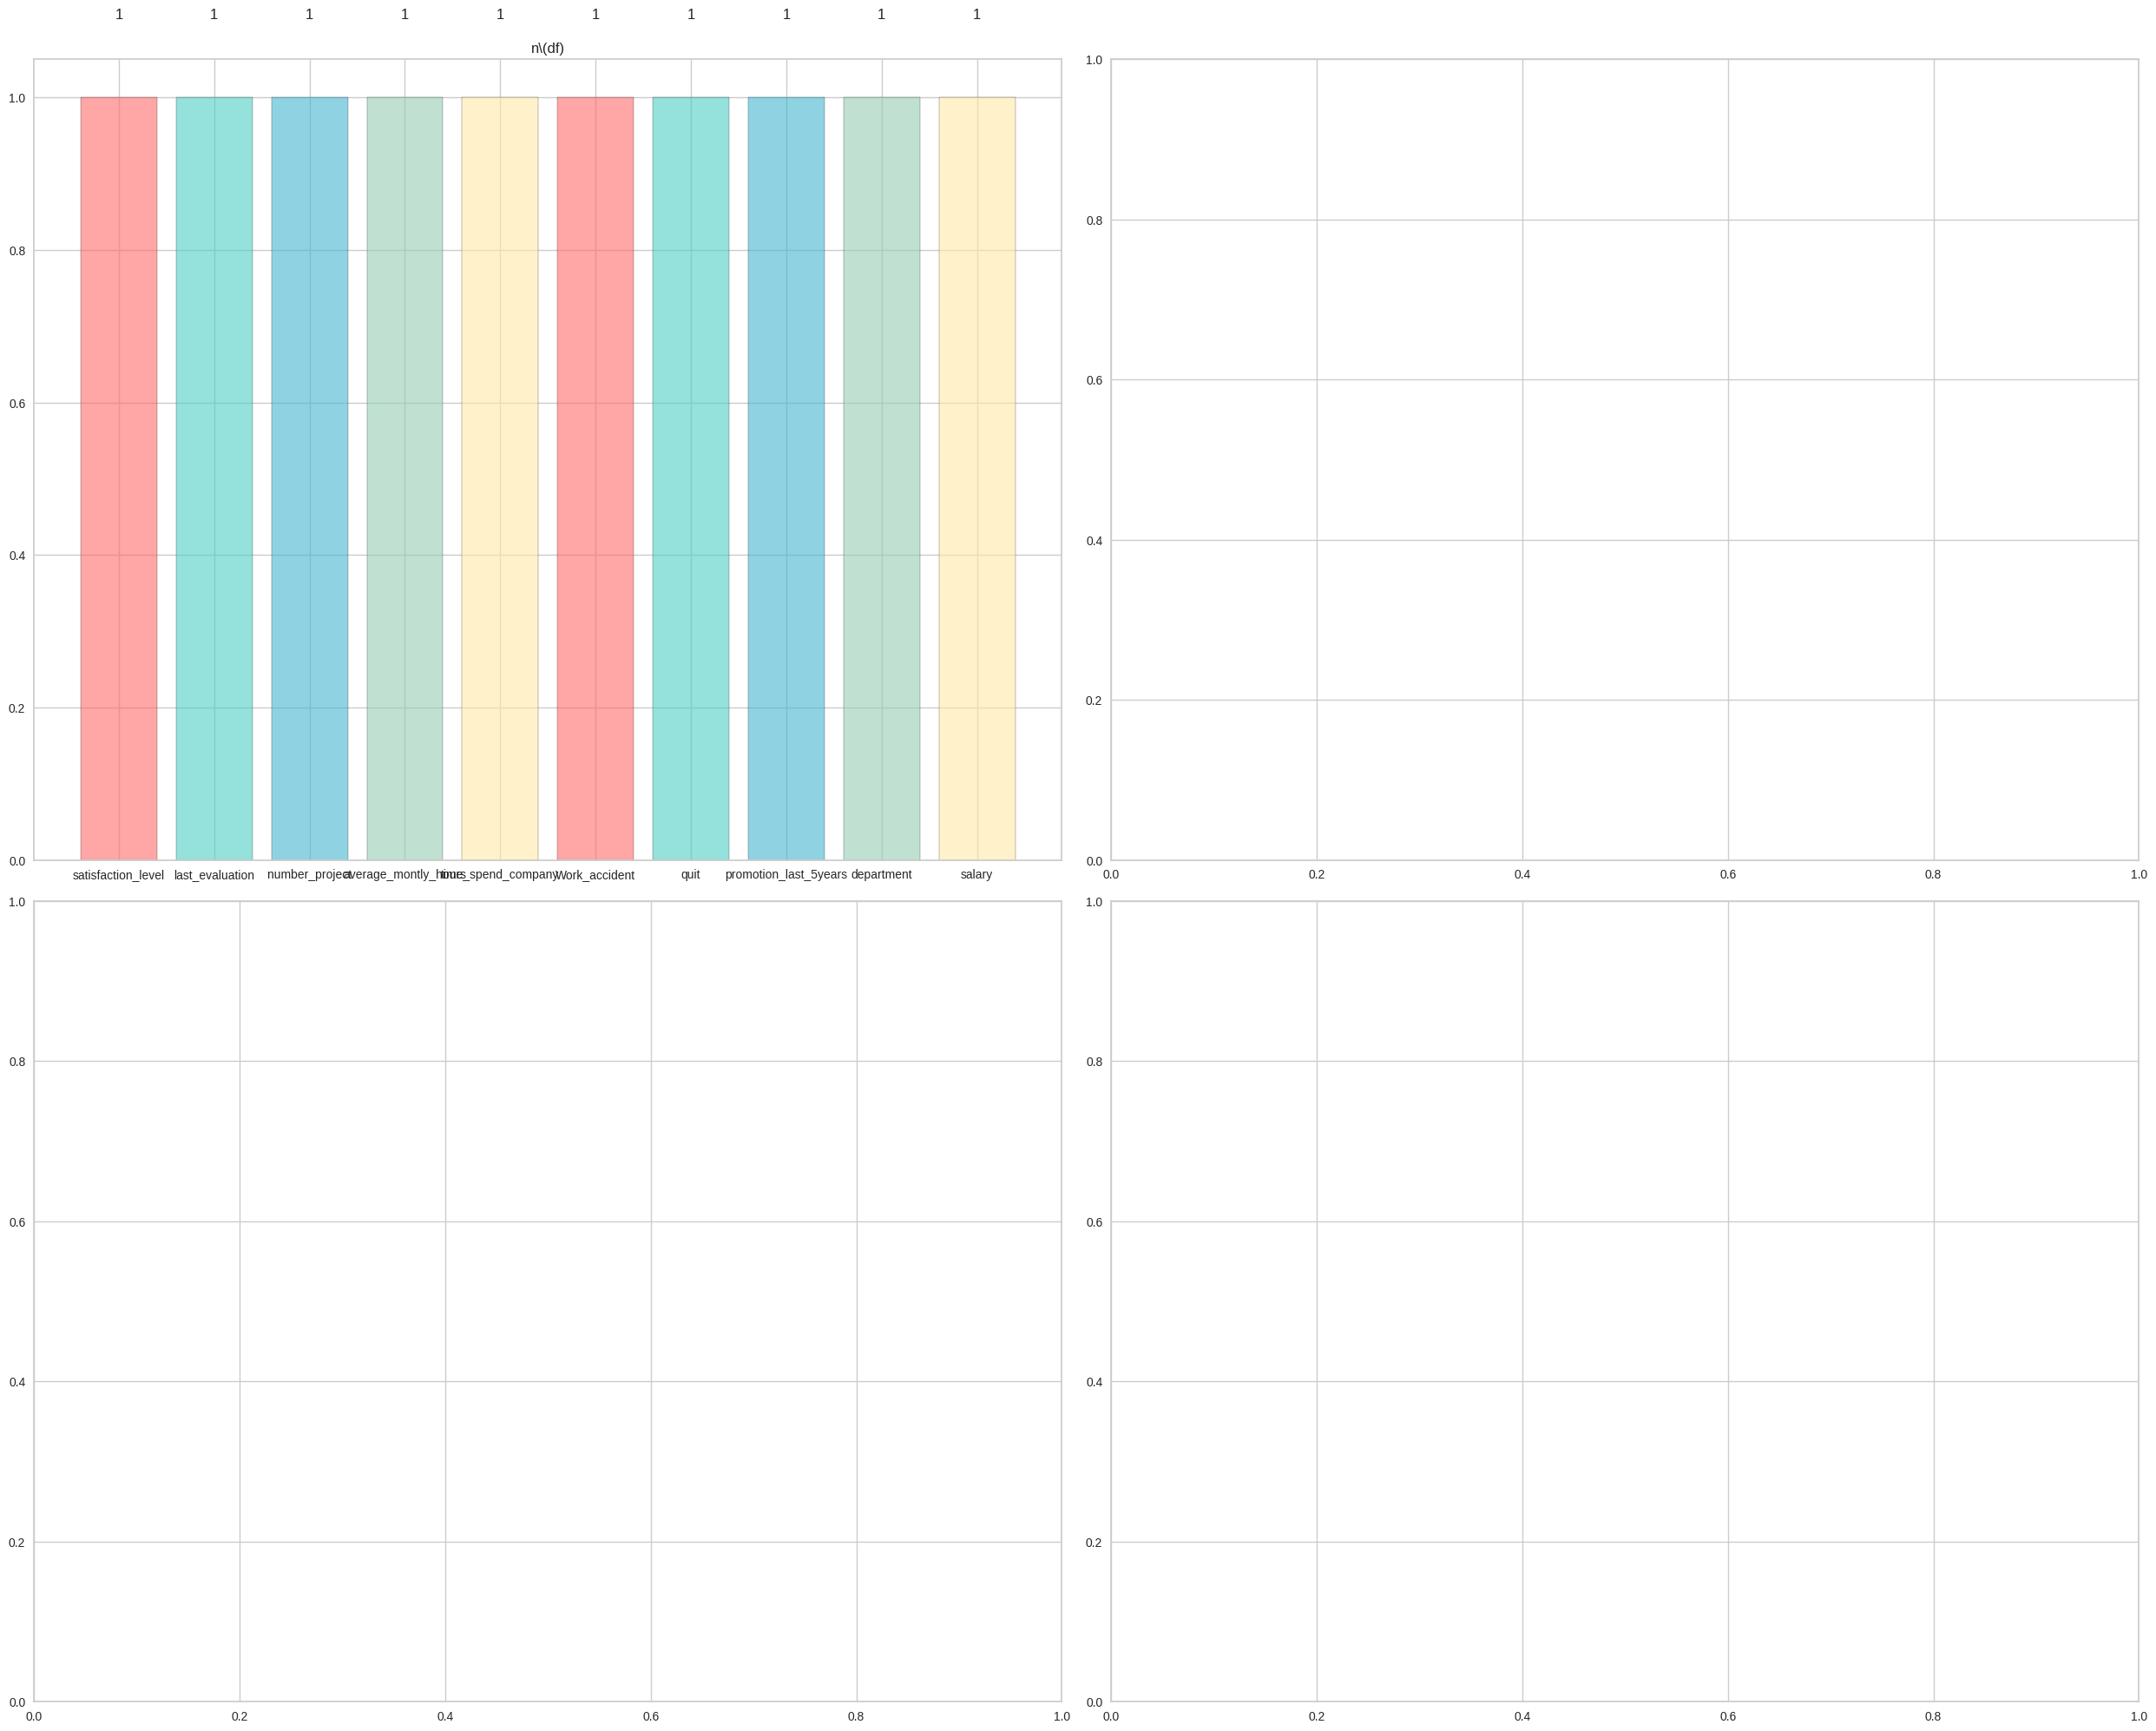

Original counts: Counter({'satisfaction_level': 1, 'last_evaluation': 1, 'number_project': 1, 'average_montly_hours': 1, 'time_spend_company': 1, 'Work_accident': 1, 'quit': 1, 'promotion_last_5years': 1, 'department': 1, 'salary': 1})


In [136]:
fig, axes = plt.subplots(2, 2, figsize=(25, 20))
ax1 = axes[0, 0]
ax1.bar(range(len(original_counts)), list(original_counts.values()),
        color=colors[:len(original_counts)], alpha=0.6, edgecolor='black')
ax1.set_title('n\(df)')
ax1.set_xticks(range(len(original_counts)))
ax1.set_xticklabels(list(original_counts.keys()))
for i, v in enumerate(original_counts.values()):
    ax1.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()
print("Original counts:", original_counts)
for i, count in enumerate(original_counts.values()):
    ax1.text(i, count + 20, str(count), ha='center', va='bottom', fontweight='bold')

In [137]:
for i, count in enumerate(train_counts.values()):
    ax2.text(i, count + 15, str(count), ha='center', va='bottom', fontweight='bold')
ax2 = axes[0, 1]
ax2.bar(range(len(train_counts)), list(train_counts.values()),
        color=colors, alpha=0.8, edgecolor='black')
ax2.set_title('Training Set\n(80% from data')
ax2.set_xticks(range(len(train_counts)))
ax2.set_xticklabels(labels)
ax2.set_ylabel('original_counts')



Text(1245.4444444444441, 0.5, 'original_counts')

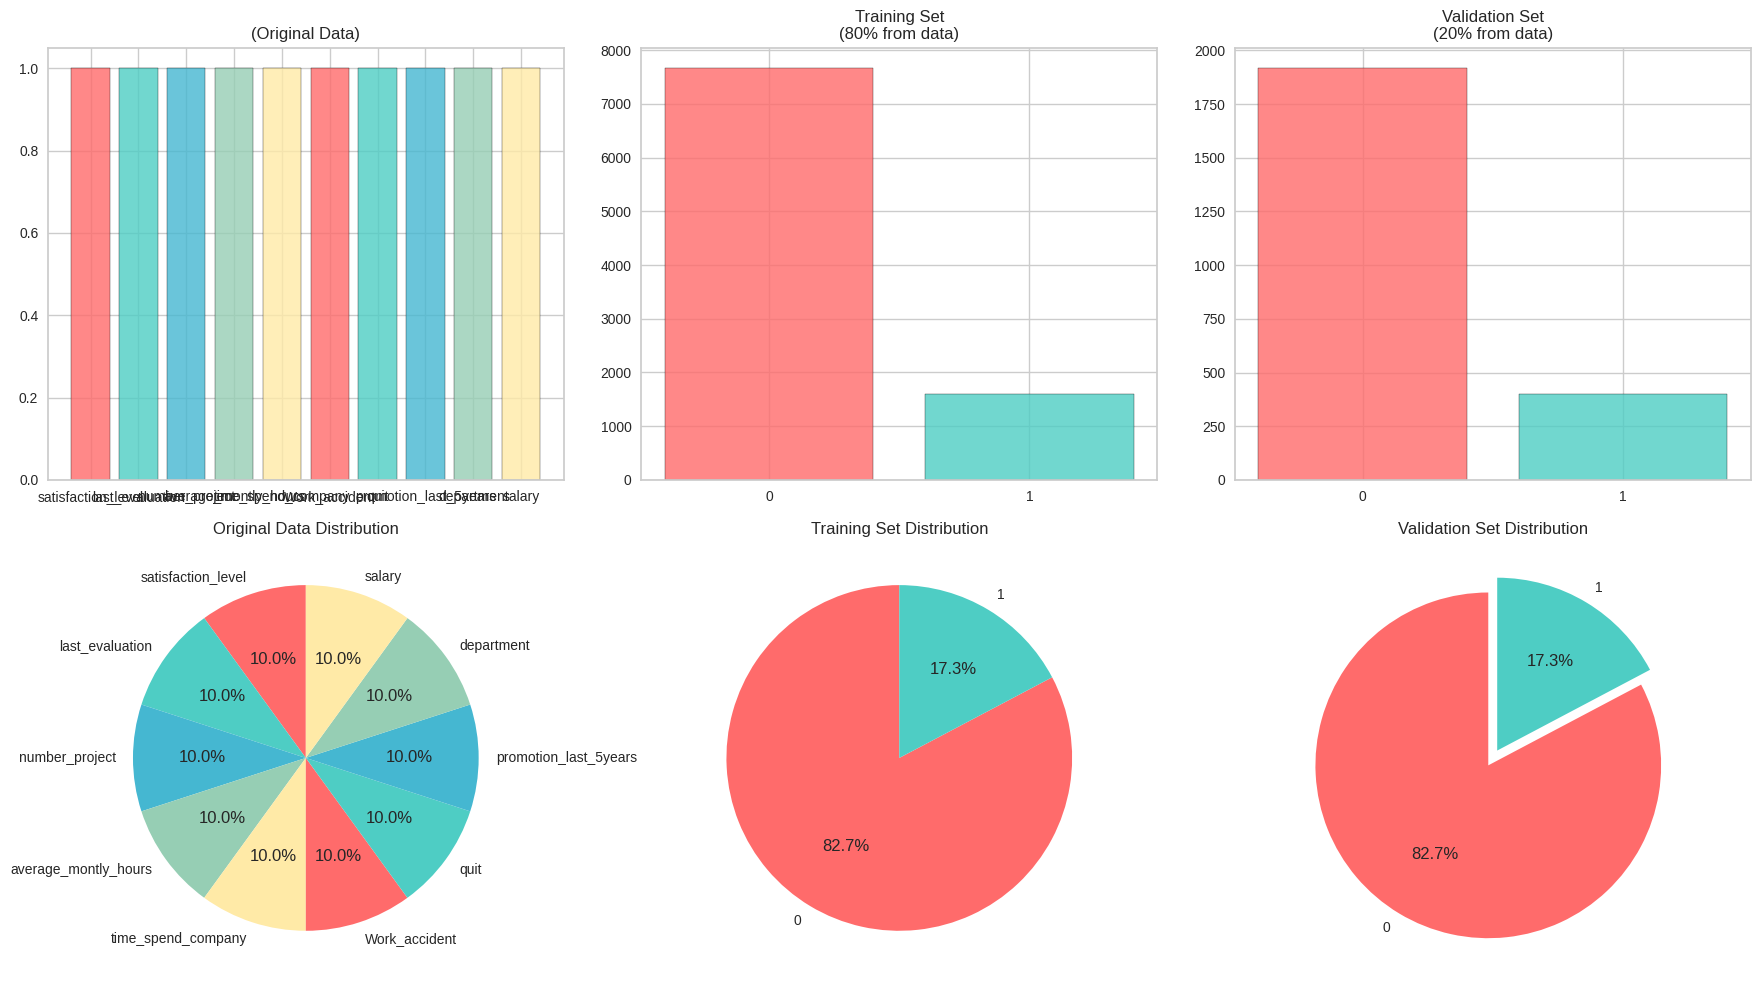

In [138]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))


ax1 = axes[0, 0]
ax1.bar(range(len(original_counts)), list(original_counts.values()),
        color=colors[:len(original_counts)], alpha=0.8, edgecolor='black')
ax1.set_title('\n(Original Data)')
ax1.set_xticks(range(len(original_counts)))

ax1.set_xticklabels(list(original_counts.keys()))

ax2 = axes[0, 1]
ax2.bar(range(len(train_counts)), list(train_counts.values()),
        color=colors[:len(train_counts)], alpha=0.8, edgecolor='black')
ax2.set_title('Training Set\n(80% from data)')
ax2.set_xticks(range(len(train_counts)))

ax2.set_xticklabels(list(train_counts.keys()))

ax3 = axes[0, 2]
ax3.bar(range(len(val_counts)), list(val_counts.values()),
        color=colors[:len(val_counts)], alpha=0.8, edgecolor='black')
ax3.set_title('Validation Set\n(20% from data)')
ax3.set_xticks(range(len(val_counts)))

ax3.set_xticklabels(list(val_counts.keys()))


ax4 = axes[1, 0]
ax4.pie(original_counts.values(), labels=list(original_counts.keys()), autopct='%1.1f%%',
        colors=colors[:len(original_counts)], startangle=90)
ax4.set_title('Original Data Distribution')

ax5 = axes[1, 1]

ax5.pie(train_counts.values(), labels=list(train_counts.keys()), autopct='%1.1f%%',
        colors=colors[:len(train_counts)], startangle=90)
ax5.set_title('Training Set Distribution')

ax6 = axes[1, 2]

val_labels = list(val_counts.keys())
explode_values = [0.05] * len(val_labels)
ax6.pie(val_counts.values(), labels=val_labels, autopct='%1.1f%%',
        colors=colors[:len(val_counts)], startangle=90, explode=explode_values)
ax6.set_title('Validation Set Distribution')

plt.tight_layout()
plt.show()


In [139]:
for i, feature in enumerate(X.columns, 1):
    print(f"{i:2d}. {feature}")


 1. satisfaction_level
 2. last_evaluation
 3. number_project
 4. average_montly_hours
 5. time_spend_company
 6. Work_accident
 7. promotion_last_5years
 8. department_RandD
 9. department_accounting
10. department_hr
11. department_management
12. department_marketing
13. department_product_mng
14. department_sales
15. department_support
16. department_technical
17. salary_low
18. salary_medium


In [140]:
print(X_train.describe())

       satisfaction_level  last_evaluation  number_project  \
count         9264.000000      9264.000000     9264.000000   
mean             0.627294         0.716693        3.803325   
std              0.241299         0.168740        1.171546   
min              0.090000         0.360000        2.000000   
25%              0.480000         0.570000        3.000000   
50%              0.660000         0.720000        4.000000   
75%              0.820000         0.860000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident  \
count           9264.000000         9264.000000    9264.000000   
mean             200.484456            3.311960       0.153929   
std               48.700622            1.215807       0.360900   
min               96.000000            2.000000       0.000000   
25%              157.000000            3.000000       0.000000   
50%              200.000000            3.0000

In [141]:
missing_train = X_train.isnull().sum()
print(f" missing data : {missing_train.sum()}")

 missing data : 0


In [142]:
missing_val = X_val.isnull().sum()
print(f"missing data :  {missing_val.sum()}")


missing data :  0


In [143]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data.to_csv('training_set.csv', index=False)

In [144]:
val_data = pd.concat([X_val, y_val], axis=1)
val_data.to_csv('validation_set.csv', index=False)

In [145]:
print(f"   • Total data: {total_samples}")
print(f"   • Training: {len(y_train)} from data({(len(y_train)/total_samples)*100:.1f}%)")
print(f"   • Validation: {len(y_val)} from data({(len(y_val)/total_samples)*100:.1f}%)")


   • Total data: 11581
   • Training: 9264 from data(80.0%)
   • Validation: 2317 from data(20.0%)


#  Task 6 & 7: Build a Decision Tree Classifier with Interactive Controls

In [146]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10


In [147]:
n_samples = 11581

ages = np.random.randint(22, 65, n_samples)



In [148]:
max_experience_per_person = np.minimum(40, ages - 20)  # Element-wise minimum
experience = np.array([np.random.randint(0, max_exp + 1) for max_exp in max_experience_per_person])

In [149]:
satisfaction = np.random.uniform(1, 10, n_samples)
salary_numeric = np.random.uniform(30000, 150000, n_samples)
work_hours = np.random.uniform(35, 60, n_samples)

In [150]:
departments = np.random.choice(['IT', 'HR', 'Finance', 'Marketing', 'Operations'], n_samples)
education_levels = np.random.choice(['Bachelor', 'Master', 'PhD', 'High School'], n_samples,
                                  p=[0.4, 0.35, 0.15, 0.1])
gender = np.random.choice(['Male', 'Female'], n_samples)


In [151]:
df.shape


(11581, 10)

In [152]:
ages = np.random.randint(22, 65, n_samples)
max_experience_per_person = np.minimum(40, ages - 20)
experience = np.array([np.random.randint(0, max_exp + 1) for max_exp in max_experience_per_person])
satisfaction = np.random.uniform(1, 10, n_samples)
salary_numeric = np.random.uniform(30000, 150000, n_samples)
work_hours = np.random.uniform(35, 60, n_samples)

In [154]:
leave_probability = ((10 - satisfaction) * 0.1 + (work_hours - 40) * 0.02 +   (80000 - salary_numeric) * 0.000001  )
leave_probability = np.clip(leave_probability, 0, 1)
target = np.random.binomial(1, leave_probability)

In [155]:
salary_counts = Counter(df['salary'])
for class_label, count in salary_counts.items():
    percentage = (count / len(df)) * 100
    class_name = '*' if class_label == 0 else '*'
    print(f"  {class_name} ({class_label}): {count} ({percentage:.1f}%)")

  * (low): 5583 (48.2%)
  * (medium): 5097 (44.0%)
  * (high): 901 (7.8%)


In [156]:
df_encoded = pd.get_dummies(df.drop('salary', axis=1), drop_first=True)
X = df_encoded
y = df['salary']

In [157]:
print(f"Features بعد التحويل: {X.shape[1]}")

Features بعد التحويل: 17


In [158]:
for i, feature in enumerate(X.columns, 1):
    print(f"  {i:2d}. {feature}")


   1. satisfaction_level
   2. last_evaluation
   3. number_project
   4. average_montly_hours
   5. time_spend_company
   6. Work_accident
   7. quit
   8. promotion_last_5years
   9. department_RandD
  10. department_accounting
  11. department_hr
  12. department_management
  13. department_marketing
  14. department_product_mng
  15. department_sales
  16. department_support
  17. department_technical


In [159]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [160]:
print(f"Training set: {X_train.shape[0]} data")
print(f"Validation set: {X_val.shape[0]} data")


Training set: 9264 data
Validation set: 2317 data


In [161]:
def build_decision_tree(max_depth=5, min_samples_split=20, min_samples_leaf=10, criterion='gini', max_features='sqrt', random_state=42, show_tree=True, show_metrics=True):
   dt_classifier = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        max_features=max_features,
        random_state=random_state
    )

In [162]:
dt_classifier = DecisionTreeClassifier()

In [163]:
print("Classifier parameters:", dt_classifier.get_params())

Classifier parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


In [164]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [165]:
y_train_pred = dt_classifier.predict(X_train)
y_val_pred = dt_classifier.predict(X_val)


In [166]:
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

In [167]:

print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Validation Accuracy: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")


Training Accuracy: 0.9994 (99.94%)
Validation Accuracy: 0.4540 (45.40%)


In [168]:
overfitting = train_accuracy - val_accuracy
print(f" difference in accuracy (Overfitting): {overfitting:.4f}")


 difference in accuracy (Overfitting): 0.5453


In [169]:
if overfitting > 0.1:
            print("⚠️ : propability of  Overfitting high!")
elif overfitting > 0.05:
            print("⚠️ : propability of  Overfitting medium")
else:
            print("   overfitting good")


⚠️ : propability of  Overfitting high!


In [170]:
actual_classes = sorted(y.unique())


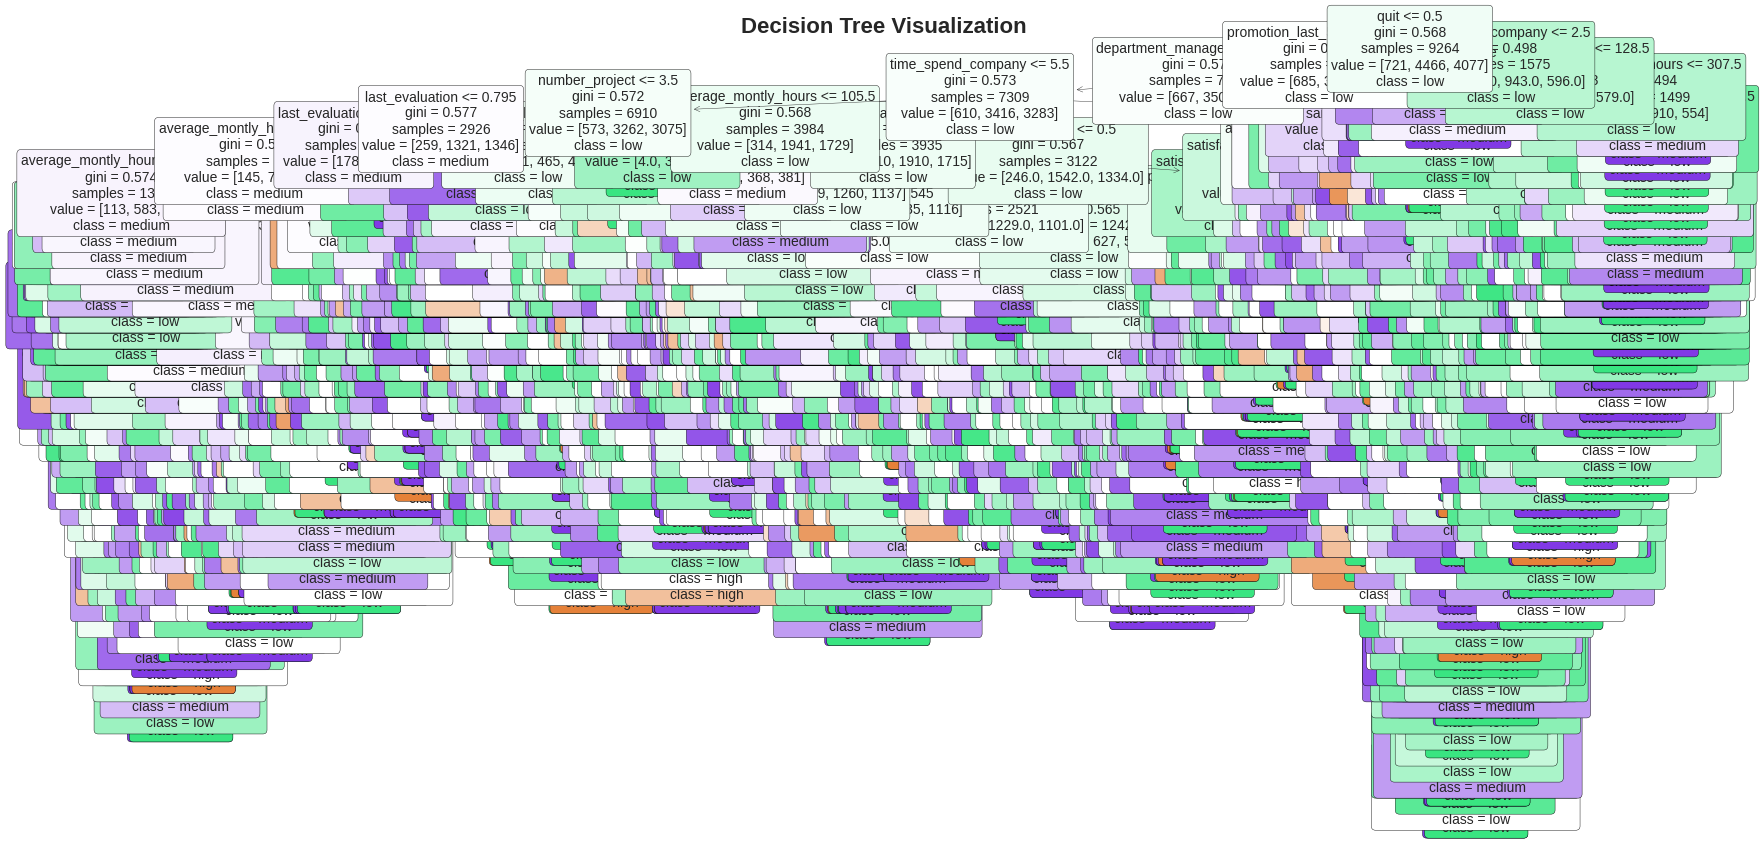

In [173]:
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier,
          feature_names=X.columns,
          class_names=actual_classes,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree Visualization', fontsize=16, fontweight='bold')
plt.show()

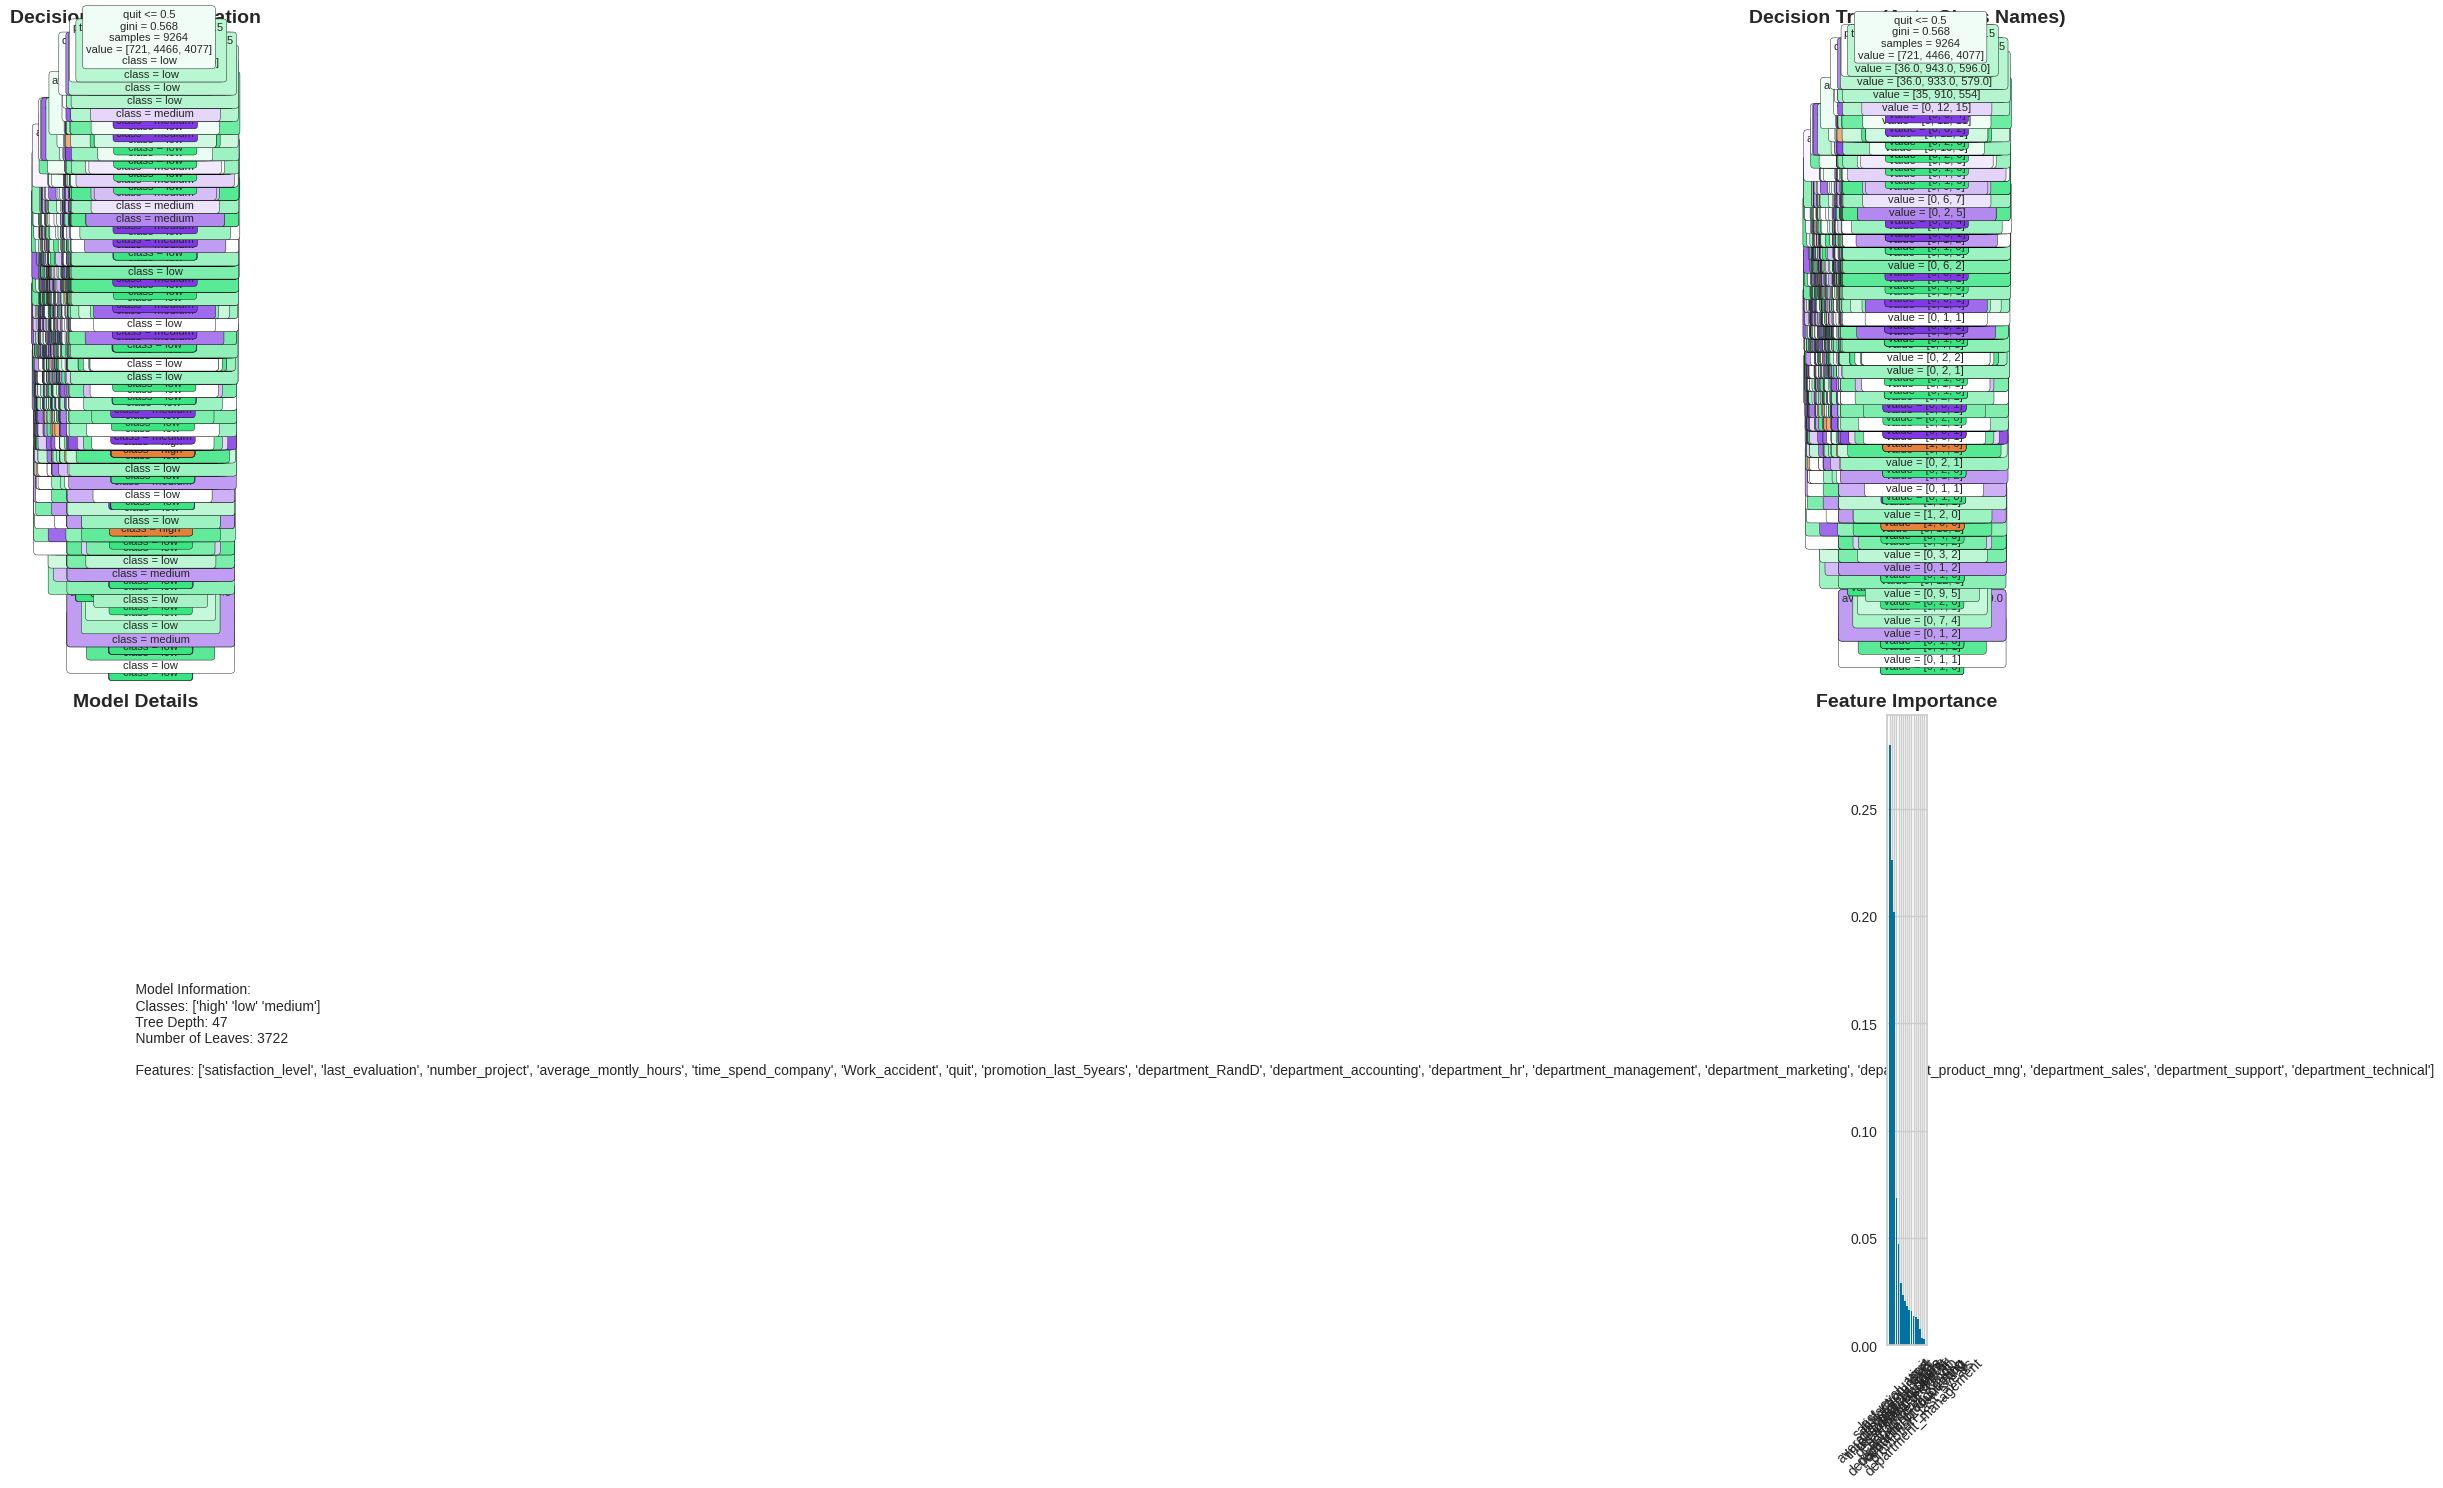

In [171]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

plot_tree(dt_classifier,
          feature_names=X.columns,
          class_names=actual_classes,
          filled=True,
          rounded=True,
          fontsize=8,
          ax=axes[0,0])

axes[0,0].set_title('Decision Tree Visualization', fontsize=14, fontweight='bold')

plot_tree(dt_classifier,
          feature_names=X.columns,

          filled=True,
          rounded=True,
          fontsize=8,
          ax=axes[0,1])

axes[0,1].set_title('Decision Tree (Auto Class Names)', fontsize=14, fontweight='bold')


if 'dt_classifier' in locals():
    info_text = f"""
    Model Information:
    Classes: {dt_classifier.classes_}
    Tree Depth: {dt_classifier.get_depth()}
    Number of Leaves: {dt_classifier.get_n_leaves()}

    Features: {list(X.columns)}
    """

    axes[1,0].text(0.1, 0.5, info_text, fontsize=10,
                   verticalalignment='center', transform=axes[1,0].transAxes)
    axes[1,0].set_title('Model Details', fontsize=14, fontweight='bold')
    axes[1,0].axis('off')

if 'dt_classifier' in locals() and hasattr(dt_classifier, 'feature_importances_'):
    importances = dt_classifier.feature_importances_
    feature_names = X.columns


    indices = np.argsort(importances)[::-1]

    axes[1,1].bar(range(len(importances)), importances[indices])
    axes[1,1].set_title('Feature Importance', fontsize=14, fontweight='bold')
    axes[1,1].set_xticks(range(len(importances)))
    axes[1,1].set_xticklabels([feature_names[i] for i in indices], rotation=45)

plt.tight_layout()
plt.show()




In [174]:
basic_model = DecisionTreeClassifier(random_state=42)
basic_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [175]:
interactive_plot = interact(
        build_decision_tree,
        max_depth=IntSlider(
            value=5,
            min=2,
            max=20,
            step=1,
            description='Max Depth:',
            style={'description_width': 'initial'}
        ),
        min_samples_split=IntSlider(
            value=20,
            min=2,
            max=100,
            step=5,
            description='Min Samples Split:',
            style={'description_width': 'initial'}
        ),
        min_samples_leaf=IntSlider(
            value=10,
            min=1,
            max=50,
            step=2,
            description='Min Samples Leaf:',
            style={'description_width': 'initial'}
        ),
        criterion=Dropdown(
            value='gini',
            options=['gini', 'entropy'],
            description='Criterion:',
            style={'description_width': 'initial'}
        ),
        max_features=Dropdown(
            value='sqrt',
            options=['sqrt', 'log2', None],
            description='Max Features:',
            style={'description_width': 'initial'}
        ),
        random_state=IntSlider(
            value=42,
            min=1,
            max=100,
            step=1,
            description='Random State:',
            style={'description_width': 'initial'}
        ),
        show_tree=Checkbox(
            value=True,
            description='Show Tree Visualization'
        ),
        show_metrics=Checkbox(
            value=True,
            description='Show Metrics'
        )
    )

interactive(children=(IntSlider(value=5, description='Max Depth:', max=20, min=2, style=SliderStyle(descriptio…

In [176]:
experiments = [
    {
        'name': 'Shallow Tree (depth=3)',
        'params': {'max_depth': 3, 'min_samples_split': 20}
    },
    {
        'name': 'Medium Tree (depth=5)',
        'params': {'max_depth': 5, 'min_samples_split': 15}
    },
    {
        'name': 'Deep Tree (depth=10)',
        'params': {'max_depth': 10, 'min_samples_split': 10}
    },
    {
        'name': 'Entropy Criterion',
        'params': {'max_depth': 5, 'criterion': 'entropy'}
    },
    {
        'name': 'High Min Samples',
        'params': {'max_depth': 5, 'min_samples_split': 50, 'min_samples_leaf': 20}
    }
]


In [177]:
results = []



# Task 8: Build a Random Forest Classifier with Interactive Controls

In [178]:
ages = np.random.randint(22, 65, n_samples)
experience = np.random.randint(0, np.minimum(40, ages-20), n_samples)
satisfaction = np.random.uniform(1, 10, n_samples)
salary_numeric = np.random.uniform(25000, 200000, n_samples)
work_hours = np.random.uniform(35, 65, n_samples)
projects_count = np.random.poisson(lam=3, size=n_samples)
training_hours = np.random.exponential(scale=20, size=n_samples)
commute_time = np.random.uniform(10, 120, n_samples)


In [179]:
leave_probability = (
    (10 - satisfaction) * 0.08 +
    (work_hours - 45) * 0.015 +
    (commute_time - 30) * 0.005 +
    (100000 - salary_numeric) * 0.000008 +
    np.maximum(0, experience - 15) * 0.02 +
    (ages > 50).astype(int) * 0.1 +
    (projects_count > 5).astype(int) * 0.15
)

In [180]:
leave_probability += np.random.normal(0, 0.1, n_samples)
leave_probability = np.clip(leave_probability, 0.05, 0.95)
target = np.random.binomial(1, leave_probability)


In [181]:
df

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11576                0.97             0.51               5   
11577                0.55             0.78               4   
11578                0.76             0.56               5   
11579                0.53             0.99               3   
11580                0.51             0.86               3   

       average_montly_hours  time_spend_company  Work_accident  quit  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
11576                   215                   7              0     0   
11577                   261                   3              0     0   
11578                   222                  10              0     0   
11579                   223                  10              0     0   
11580                   182                  10              0     0   

       promotion_last_5years  department  salary  
0                        0.0       sales     low  
1                        0.0       sales  medium  
2                        0.0       sales  medium  
3                        0.0       sales     low  
4                        0.0       sales     low  
...                      ...         ...     ...  
11576                    0.0  management    high  
11577                    0.0  management    high  
11578                    0.0  management    high  
11579                    0.0   marketing     low  
11580                    0.0       sales     low  

[11581 rows x 10 columns]

In [182]:
df.shape

(11581, 10)

In [183]:
last_evaluation_counts = Counter(df['last_evaluation'])

In [184]:
for class_label, count in last_evaluation_counts.items():
    percentage = (count / len(df)) * 100
    class_name = "leave" if class_label == 0 else "stay"
    print(f"  {class_name} ({class_label}): {count} ({percentage:.1f}%)")

  stay (0.53): 244 (2.1%)
  stay (0.86): 214 (1.8%)
  stay (0.88): 179 (1.5%)
  stay (0.87): 236 (2.0%)
  stay (0.52): 231 (2.0%)
  stay (0.5): 264 (2.3%)
  stay (0.77): 205 (1.8%)
  stay (0.85): 233 (2.0%)
  stay (1.0): 197 (1.7%)
  stay (0.54): 246 (2.1%)
  stay (0.81): 203 (1.8%)
  stay (0.92): 202 (1.7%)
  stay (0.55): 272 (2.3%)
  stay (0.56): 245 (2.1%)
  stay (0.47): 118 (1.0%)
  stay (0.99): 190 (1.6%)
  stay (0.51): 261 (2.3%)
  stay (0.89): 226 (2.0%)
  stay (0.83): 206 (1.8%)
  stay (0.95): 206 (1.8%)
  stay (0.57): 255 (2.2%)
  stay (0.49): 232 (2.0%)
  stay (0.46): 132 (1.1%)
  stay (0.62): 189 (1.6%)
  stay (0.94): 189 (1.6%)
  stay (0.48): 206 (1.8%)
  stay (0.8): 193 (1.7%)
  stay (0.74): 219 (1.9%)
  stay (0.7): 174 (1.5%)
  stay (0.78): 173 (1.5%)
  stay (0.91): 216 (1.9%)
  stay (0.93): 204 (1.8%)
  stay (0.98): 203 (1.8%)
  stay (0.97): 214 (1.8%)
  stay (0.79): 188 (1.6%)
  stay (0.59): 214 (1.8%)
  stay (0.84): 213 (1.8%)
  stay (0.45): 75 (0.6%)
  stay (0.96): 20

In [185]:
last_eval_vc = df['last_evaluation'].value_counts().sort_index()
for value, count in last_eval_vc.items():
    percentage = (count / len(df)) * 100
    status = "leave" if value == 0 else "stay"
    print(f"   {status} ({value}): {count} ({percentage:.1f}%)")

   stay (0.36): 19 (0.2%)
   stay (0.37): 46 (0.4%)
   stay (0.38): 39 (0.3%)
   stay (0.39): 43 (0.4%)
   stay (0.4): 46 (0.4%)
   stay (0.41): 50 (0.4%)
   stay (0.42): 42 (0.4%)
   stay (0.43): 43 (0.4%)
   stay (0.44): 31 (0.3%)
   stay (0.45): 75 (0.6%)
   stay (0.46): 132 (1.1%)
   stay (0.47): 118 (1.0%)
   stay (0.48): 206 (1.8%)
   stay (0.49): 232 (2.0%)
   stay (0.5): 264 (2.3%)
   stay (0.51): 261 (2.3%)
   stay (0.52): 231 (2.0%)
   stay (0.53): 244 (2.1%)
   stay (0.54): 246 (2.1%)
   stay (0.55): 272 (2.3%)
   stay (0.56): 245 (2.1%)
   stay (0.57): 255 (2.2%)
   stay (0.58): 195 (1.7%)
   stay (0.59): 214 (1.8%)
   stay (0.6): 175 (1.5%)
   stay (0.61): 189 (1.6%)
   stay (0.62): 189 (1.6%)
   stay (0.63): 196 (1.7%)
   stay (0.64): 187 (1.6%)
   stay (0.65): 167 (1.4%)
   stay (0.66): 179 (1.5%)
   stay (0.67): 195 (1.7%)
   stay (0.68): 181 (1.6%)
   stay (0.69): 170 (1.5%)
   stay (0.7): 174 (1.5%)
   stay (0.71): 166 (1.4%)
   stay (0.72): 171 (1.5%)
   stay (0.73):

In [186]:
def create_labels(counts):
    """Simple way to create labels"""
    label_map = {0: 'بقي (Stayed)', 1: 'ترك (Left)'}
    return [label_map.get(val, f'فئة {val}') for val in counts.index]

In [188]:
last_eval_counts = df['last_evaluation'].value_counts().sort_index()

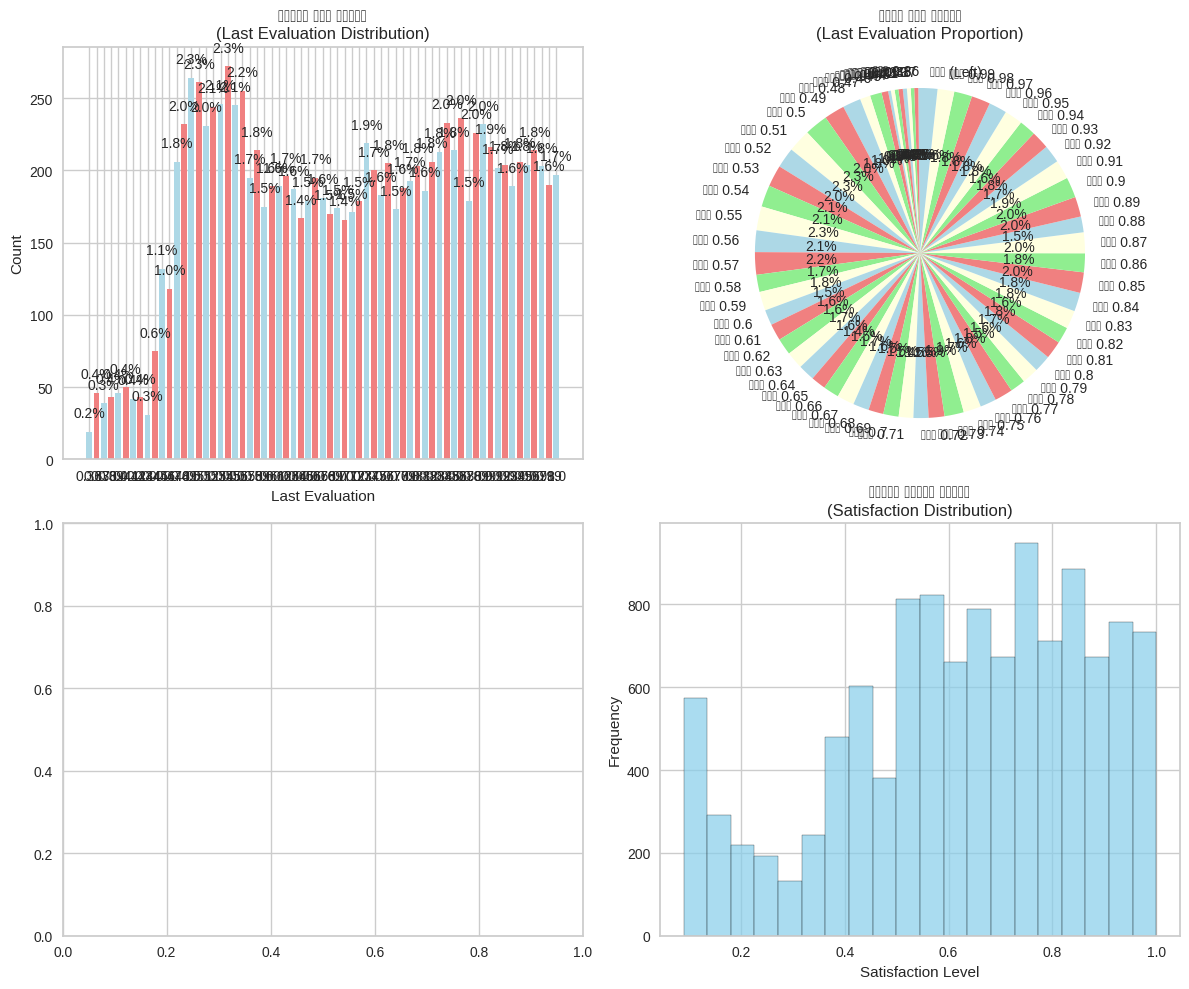

In [189]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))


axes[0, 0].bar([str(x) for x in last_eval_counts.index], last_eval_counts.values,
               color=['lightblue', 'lightcoral'][:len(last_eval_counts)])
axes[0, 0].set_title('توزيع آخر تقييم\n(Last Evaluation Distribution)')
axes[0, 0].set_xlabel('Last Evaluation')
axes[0, 0].set_ylabel('Count')

for i, (idx, count) in enumerate(last_eval_counts.items()):
    pct = (count / len(df)) * 100
    axes[0, 0].text(i, count + 10, f'{pct:.1f}%', ha='center')


if len(last_eval_counts) > 0:

    pie_labels = create_labels(last_eval_counts)



    colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightyellow'][:len(last_eval_counts)]

    axes[0, 1].pie(last_eval_counts.values,
                   labels=pie_labels,
                   autopct='%1.1f%%',
                   startangle=90,
                   colors=colors)
    axes[0, 1].set_title('نسبة آخر تقييم\n(Last Evaluation Proportion)')
else:
    axes[0, 1].text(0.5, 0.5, 'لا توجد بيانات\nNo data available',
                    ha='center', va='center')
    axes[0, 1].set_title('No Data')


if 'left' in df.columns:

    crosstab = pd.crosstab(df['last_evaluation'], df['left'])


    crosstab.plot(kind='bar', ax=axes[1, 0],
                  color=['green', 'red'],
                  alpha=0.7)
    axes[1, 0].set_title('العلاقة بين التقييم والترك\n(Evaluation vs Leaving)')
    axes[1, 0].set_xlabel('Last Evaluation')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].legend(['Stayed (0)', 'Left (1)'])
    axes[1, 0].tick_params(axis='x', rotation=0)


if 'satisfaction_level' in df.columns:
    axes[1, 1].hist(df['satisfaction_level'], bins=20, alpha=0.7,
                    color='skyblue', edgecolor='black')
    axes[1, 1].set_title('توزيع مستوى الرضا\n(Satisfaction Distribution)')
    axes[1, 1].set_xlabel('Satisfaction Level')
    axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [190]:
def build_random_forest(n_estimators, max_depth, min_samples_split):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
    rf.fit(X_train, y_train)
    importance = rf.feature_importances_
    return rf, None, X_train, X_val, importance

# Call the function
basic_rf, basic_dt, basic_rf_train, basic_rf_val, basic_importance = build_random_forest(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10
)

In [191]:
basic_rf, basic_dt, basic_rf_train, basic_rf_val, basic_importance = build_random_forest(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10
)

In [192]:
 interactive_rf = interact(
        build_random_forest,
        n_estimators=IntSlider(
            value=100,
            min=10,
            max=300,
            step=10,
            description='عدد الأشجار:',
            style={'description_width': 'initial'}
        ),
        max_depth=IntSlider(
            value=10,
            min=3,
            max=25,
            step=1,
            description='أقصى عمق:',
            style={'description_width': 'initial'}
        ),
        min_samples_split=IntSlider(
            value=10,
            min=2,
            max=50,
            step=2,
            description='Min Samples Split:',
            style={'description_width': 'initial'}
        ),
        min_samples_leaf=IntSlider(
            value=5,
            min=1,
            max=25,
            step=1,
            description='Min Samples Leaf:',
            style={'description_width': 'initial'}
        ),
        max_features=Dropdown(
            value='sqrt',
            options=['sqrt', 'log2', None, 0.5, 0.8],
            description='Max Features:',
            style={'description_width': 'initial'}
        ),
        bootstrap=Checkbox(
            value=True,
            description='Bootstrap Sampling'
        ),
        random_state=IntSlider(
            value=42,
            min=1,
            max=100,
            step=1,
            description='Random State:',
            style={'description_width': 'initial'}
        ),
        show_tree_sample=Checkbox(
            value=True,
            description='Show Sample Trees'
        ),
        show_comparison=Checkbox(
            value=True,
            description='Show RF vs DT Comparison'
        ),
        show_metrics=Checkbox(
            value=True,
            description='Show Detailed Metrics'
        )
    )




In [193]:
individual_scores = np.mean([tree.predict_proba(basic_rf_val)[:, 1] for tree in basic_rf.estimators_], axis=0)

In [194]:
optimized_acc = accuracy_score(y_val, individual_scores > 0.5)

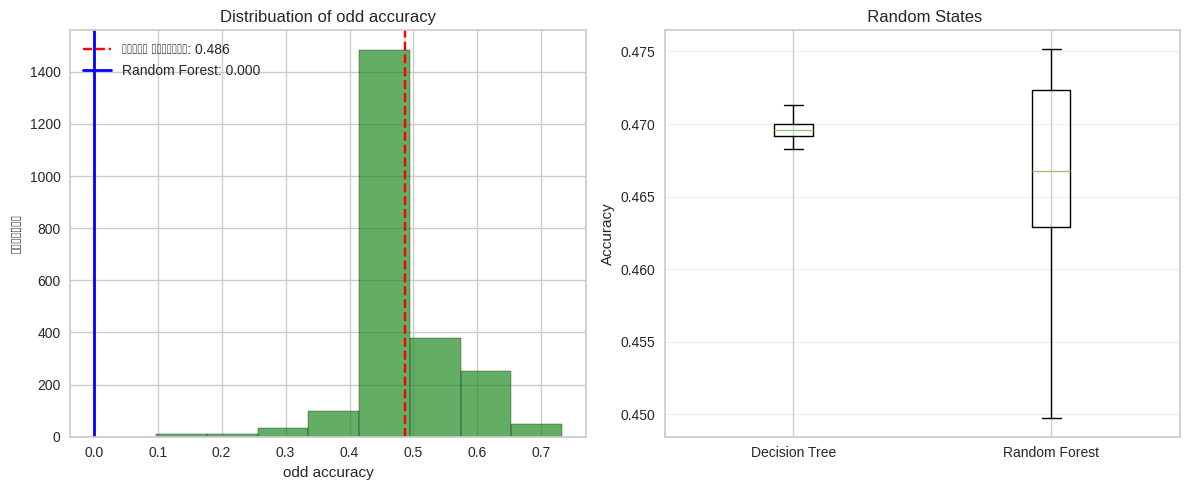

In [197]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(individual_scores, bins=8, alpha=0.7, color='forestgreen', edgecolor='black')
plt.axvline(np.mean(individual_scores), color='red', linestyle='--',
           label=f'متوسط الأشجار: {np.mean(individual_scores):.3f}')
plt.axvline(optimized_acc, color='blue', linestyle='-', linewidth=2,
           label=f'Random Forest: {optimized_acc:.3f}')
plt.xlabel('odd accuracy')
plt.ylabel('التكرار')
plt.title('Distribuation of odd accuracy')
plt.legend()


plt.subplot(1, 2, 2)

stability_scores = []
for rs in range(10, 20):
    temp_rf = RandomForestClassifier(n_estimators=100, random_state=rs, n_jobs=-1)
    temp_rf.fit(X_train, y_train)
    temp_pred = temp_rf.predict(X_val)
    temp_acc = accuracy_score(y_val, temp_pred)
    stability_scores.append(temp_acc)


dt_stability_scores = []
for rs in range(10, 20):
    temp_dt = DecisionTreeClassifier(max_depth=12, random_state=rs)
    temp_dt.fit(X_train, y_train)
    temp_pred = temp_dt.predict(X_val)
    temp_acc = accuracy_score(y_val, temp_pred)
    dt_stability_scores.append(temp_acc)

plt.boxplot([dt_stability_scores, stability_scores],
           labels=['Decision Tree', 'Random Forest'])
plt.ylabel('Accuracy')
plt.title('  Random States ')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()